# Universities Analysis

**Questions: **
1. Do universities with a high number of applications are the preferred ones by students? in other words, could the number of applications tell us that a university is one of the most preferred by students?
2. Do students prefer universities that have a high rate of admission? in other words, do students prefer a university where it is easier for them to be admitted?
3. Do students prefer public or private universities?
4. Do students prefer universities with low tuition and fees?
5. Do students prefer a university for its low on-campus cost of living?
6. Do students prefer universities from highly populated states?
7. Do students prefer a university because it belongs to a state with a high GDP per capita?
8. Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?

**Importing Libraries**

In [1309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use("ggplot")

import warnings
warnings.filterwarnings('ignore')

**Loading the dataset to dataframe**

In [1310]:
university=pd.read_csv('universities_data.csv')

In [1311]:
university.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 145 entries, ID number to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(114), int64(2), object(29)
memory usage: 1.7+ MB


In [1312]:
university.head(3)

ID number                                 Name  year    ZIP code  \
0     100654             Alabama A & M University  2013       35762   
1     100663  University of Alabama at Birmingham  2013  35294-0110   
2     100690                   Amridge University  2013  36117-3553   

                              Highest degree offered        County name  \
0             Doctor's degree - research/scholarship     Madison County   
1  Doctor's degree - research/scholarship and pro...   Jefferson County   
2  Doctor's degree - research/scholarship and pro...  Montgomery County   

  Longitude location of institution Latitude location of institution  \
0                          -865,685                        3,478,337   
1                          -868,092                        3,350,223   
2                           -86,174                        3,236,261   

  Religious affiliation Offers Less than one year certificate  ...  \
0        Not applicable                            Implied no  ...   
1        Not applicable                            Implied no  ...   
2    Churches of Christ                            Implied no  ...   

  Percent of freshmen receiving federal grant aid  \
0                                            81.0   
1                                            36.0   
2                                            90.0   

  Percent of freshmen receiving Pell grants  \
0                                      81.0   
1                                      36.0   
2                                      90.0   

  Percent of freshmen receiving other federal grant aid  \
0                                                7.0      
1                                               10.0      
2                                                0.0      

  Percent of freshmen receiving state/local grant aid  \
0                                                1.0    
1                                                0.0    
2                                               40.0    

  Percent of freshmen receiving institutional grant aid  \
0                                               32.0      
1                                               60.0      
2                                               90.0      

  Percent of freshmen receiving student loan aid  \
0                                           89.0   
1                                           56.0   
2                                          100.0   

  Percent of freshmen receiving federal student loans  \
0                                               89.0    
1                                               55.0    
2                                              100.0    

  Percent of freshmen receiving other loan aid  \
0                                          1.0   
1                                          5.0   
2                                          0.0   

  Endowment assets (year end) per FTE enrollment (GASB)  \
0                                                NaN      
1                                            24136.0      
2                                                NaN      

  Endowment assets (year end) per FTE enrollment (FASB)  
0                                                NaN     
1                                                NaN     
2                                              302.0     

[3 rows x 145 columns]

In [1313]:
university.columns

Index(['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered',
       'County name', 'Longitude location of institution',
       'Latitude location of institution', 'Religious affiliation',
       'Offers Less than one year certificate',
       ...
       'Percent of freshmen receiving federal grant aid',
       'Percent of freshmen receiving Pell grants',
       'Percent of freshmen receiving other federal grant aid',
       'Percent of freshmen receiving state/local grant aid',
       'Percent of freshmen receiving institutional grant aid',
       'Percent of freshmen receiving student loan aid',
       'Percent of freshmen receiving federal student loans',
       'Percent of freshmen receiving other loan aid',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment (FASB)'],
      dtype='object', length=145)

In [1314]:
states_gdp=pd.read_csv('states_gdp.csv')

In [1315]:
states_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         51 non-null     int64  
 1   state        51 non-null     object 
 2   gdp_million  51 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [1316]:
states_gdp.head()

code       state  gdp_million
0  1000     Alabama     191481.0
1  2000      Alaska      56622.8
2  4000     Arizona     275199.1
3  5000    Arkansas     114251.5
4  6000  California    2262771.2

In [1317]:
region=pd.read_csv('region.csv')

In [1318]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   51 non-null     object
 1   region  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [1319]:
region.head()

state     region
0     Alabama      South
1      Alaska       West
2     Arizona  Southwest
3    Arkansas      South
4  California       West

**Data Pre-Processing**

In [1320]:
university.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 145 entries, ID number to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(114), int64(2), object(29)
memory usage: 1.7+ MB


In [1321]:
university.shape

(1534, 145)

In [1322]:
university.nunique()

ID number                                                1534
Name                                                     1517
year                                                        1
ZIP code                                                 1513
Highest degree offered                                      6
                                                         ... 
Percent of freshmen receiving student loan aid             97
Percent of freshmen receiving federal student loans        98
Percent of freshmen receiving other loan aid               46
Endowment assets (year end) per FTE enrollment (GASB)     506
Endowment assets (year end) per FTE enrollment (FASB)     950
Length: 145, dtype: int64

In [1323]:
#Lot of missing values. 
university.isnull().sum().sort_values(ascending=False).head(20)


Endowment assets (year end) per FTE enrollment (GASB)       1018
SAT Writing 25th percentile score                            820
SAT Writing 75th percentile score                            820
Number of first-time undergraduates - foreign countries      623
Percent of first-time undergraduates - out-of-state          623
Number of first-time undergraduates - out-of-state           623
Percent of first-time undergraduates - in-state              623
Number of first-time undergraduates - in-state               623
Number of first-time undergraduates - residence unknown      623
Percent of first-time undergraduates - residence unknown     623
Percent of first-time undergraduates - foreign countries     623
Endowment assets (year end) per FTE enrollment (FASB)        574
SAT Critical Reading 75th percentile score                   365
SAT Critical Reading 25th percentile score                   365
SAT Math 75th percentile score                               352
SAT Math 25th percentile 

In [1324]:
#checking percentage of null values in each columns
percent_null_eachcolumn=round((university.isnull().sum()/len(university))*100,1)
percent_null_eachcolumn

ID number                                                 0.0
Name                                                      0.0
year                                                      0.0
ZIP code                                                  0.0
Highest degree offered                                    0.0
                                                         ... 
Percent of freshmen receiving student loan aid            2.7
Percent of freshmen receiving federal student loans       2.7
Percent of freshmen receiving other loan aid              2.7
Endowment assets (year end) per FTE enrollment (GASB)    66.4
Endowment assets (year end) per FTE enrollment (FASB)    37.4
Length: 145, dtype: float64

In [1325]:
percent_null_eachcolumn[percent_null_eachcolumn>=20].sort_values()

ACT Composite 75th percentile score                         21.8
ACT Composite 25th percentile score                         21.8
SAT Math 25th percentile score                              22.9
SAT Math 75th percentile score                              22.9
SAT Critical Reading 25th percentile score                  23.8
SAT Critical Reading 75th percentile score                  23.8
Endowment assets (year end) per FTE enrollment (FASB)       37.4
Percent of first-time undergraduates - in-state             40.6
Number of first-time undergraduates - out-of-state          40.6
Percent of first-time undergraduates - out-of-state         40.6
Number of first-time undergraduates - foreign countries     40.6
Percent of first-time undergraduates - foreign countries    40.6
Number of first-time undergraduates - residence unknown     40.6
Percent of first-time undergraduates - residence unknown    40.6
Number of first-time undergraduates - in-state              40.6
SAT Writing 25th percenti

In [1326]:
percent_null_eachcolumn[percent_null_eachcolumn>=20].count()

18

In [1327]:
null_columns_to_delete=percent_null_eachcolumn[percent_null_eachcolumn>=20]
null_columns_to_delete

SAT Critical Reading 25th percentile score                  23.8
SAT Critical Reading 75th percentile score                  23.8
SAT Math 25th percentile score                              22.9
SAT Math 75th percentile score                              22.9
SAT Writing 25th percentile score                           53.5
SAT Writing 75th percentile score                           53.5
ACT Composite 25th percentile score                         21.8
ACT Composite 75th percentile score                         21.8
Number of first-time undergraduates - in-state              40.6
Percent of first-time undergraduates - in-state             40.6
Number of first-time undergraduates - out-of-state          40.6
Percent of first-time undergraduates - out-of-state         40.6
Number of first-time undergraduates - foreign countries     40.6
Percent of first-time undergraduates - foreign countries    40.6
Number of first-time undergraduates - residence unknown     40.6
Percent of first-time und

In [1328]:
null_columns_to_delete.index

Index(['SAT Critical Reading 25th percentile score',
       'SAT Critical Reading 75th percentile score',
       'SAT Math 25th percentile score', 'SAT Math 75th percentile score',
       'SAT Writing 25th percentile score',
       'SAT Writing 75th percentile score',
       'ACT Composite 25th percentile score',
       'ACT Composite 75th percentile score',
       'Number of first-time undergraduates - in-state',
       'Percent of first-time undergraduates - in-state',
       'Number of first-time undergraduates - out-of-state',
       'Percent of first-time undergraduates - out-of-state',
       'Number of first-time undergraduates - foreign countries',
       'Percent of first-time undergraduates - foreign countries',
       'Number of first-time undergraduates - residence unknown',
       'Percent of first-time undergraduates - residence unknown',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment (FASB)'],
      

In [1329]:
#Its better to delete these columns that have 20% or more null values.
null_columns=['SAT Critical Reading 25th percentile score',
       'SAT Critical Reading 75th percentile score',
       'SAT Math 25th percentile score', 'SAT Math 75th percentile score',
       'SAT Writing 25th percentile score',
       'SAT Writing 75th percentile score',
       'ACT Composite 25th percentile score',
       'ACT Composite 75th percentile score',
       'Number of first-time undergraduates - in-state',
       'Percent of first-time undergraduates - in-state',
       'Number of first-time undergraduates - out-of-state',
       'Percent of first-time undergraduates - out-of-state',
       'Number of first-time undergraduates - foreign countries',
       'Percent of first-time undergraduates - foreign countries',
       'Number of first-time undergraduates - residence unknown',
       'Percent of first-time undergraduates - residence unknown',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment (FASB)']
university_without_null=university.drop(columns=null_columns, axis=1)

In [1330]:
university_without_null.head(2)

ID number                                 Name  year    ZIP code  \
0     100654             Alabama A & M University  2013       35762   
1     100663  University of Alabama at Birmingham  2013  35294-0110   

                              Highest degree offered       County name  \
0             Doctor's degree - research/scholarship    Madison County   
1  Doctor's degree - research/scholarship and pro...  Jefferson County   

  Longitude location of institution Latitude location of institution  \
0                          -865,685                        3,478,337   
1                          -868,092                        3,350,223   

  Religious affiliation Offers Less than one year certificate  ...  \
0        Not applicable                            Implied no  ...   
1        Not applicable                            Implied no  ...   

  Percent of freshmen receiving any financial aid  \
0                                            97.0   
1                                            90.0   

  Percent of freshmen receiving federal, state, local or institutional grant aid  \
0                                               89.0                               
1                                               79.0                               

  Percent of freshmen receiving federal grant aid  \
0                                            81.0   
1                                            36.0   

  Percent of freshmen receiving Pell grants  \
0                                      81.0   
1                                      36.0   

  Percent of freshmen receiving other federal grant aid  \
0                                                7.0      
1                                               10.0      

  Percent of freshmen receiving state/local grant aid  \
0                                                1.0    
1                                                0.0    

  Percent of freshmen receiving institutional grant aid  \
0                                               32.0      
1                                               60.0      

  Percent of freshmen receiving student loan aid  \
0                                           89.0   
1                                           56.0   

  Percent of freshmen receiving federal student loans  \
0                                               89.0    
1                                               55.0    

  Percent of freshmen receiving other loan aid  
0                                          1.0  
1                                          5.0  

[2 rows x 127 columns]

In [1331]:
#18 columns got deleted. 145-18=127
university_without_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 127 entries, ID number to Percent of freshmen receiving other loan aid
dtypes: float64(96), int64(2), object(29)
memory usage: 1.5+ MB


In [1332]:
university_without_null.describe()

ID number    year  Applicants total  Admissions total  \
count    1534.000000  1534.0       1377.000000       1377.000000   
mean   189091.037810  2013.0       6391.193174       3554.880174   
std     58641.915456     0.0       8787.469171       4309.457606   
min    100654.000000  2013.0          0.000000          0.000000   
25%    153148.500000  2013.0       1488.000000        950.000000   
50%    186508.000000  2013.0       3350.000000       2056.000000   
75%    215730.000000  2013.0       7016.000000       4203.000000   
max    456490.000000  2013.0      72676.000000      35815.000000   

       Enrolled total  Percent of freshmen submitting SAT scores  \
count     1377.000000                                1257.000000   
mean      1043.046478                                  53.927605   
std       1285.165519                                  34.385164   
min          0.000000                                   0.000000   
25%        287.000000                                  16.000000   
50%        538.000000                                  65.000000   
75%       1246.000000                                  86.000000   
max      10241.000000                                 100.000000   

       Percent of freshmen submitting ACT scores  Estimated enrollment, total  \
count                                1259.000000                  1532.000000   
mean                                   53.085782                  7033.115535   
std                                    31.658662                  9387.648898   
min                                     0.000000                    68.000000   
25%                                    26.000000                  1497.250000   
50%                                    49.000000                  3126.000000   
75%                                    87.000000                  8376.000000   
max                                   100.000000                 79576.000000   

       Estimated enrollment, full time  Estimated enrollment, part time  ...  \
count                      1531.000000                      1523.000000  ...   
mean                       5367.621816                      1678.860144  ...   
std                        7462.468258                      2894.533965  ...   
min                           2.000000                         0.000000  ...   
25%                        1199.500000                       168.000000  ...   
50%                        2335.000000                       665.000000  ...   
75%                        6043.000000                      2029.500000  ...   
max                       50012.000000                     41704.000000  ...   

       Percent of freshmen receiving any financial aid  \
count                                      1492.000000   
mean                                         90.672252   
std                                          11.963692   
min                                          18.000000   
25%                                          87.000000   
50%                                          95.000000   
75%                                          99.000000   
max                                         100.000000   

       Percent of freshmen receiving federal, state, local or institutional grant aid  \
count                                        1492.000000                                
mean                                           84.464477                                
std                                            17.304491                                
min                                            10.000000                                
25%                                            73.000000                                
50%                                            92.000000                                
75%                                            99.000000                                
max                                           100.000000                                

       Pe

In [1333]:
university_without_null.isnull().sum().sort_values(ascending=False)[:60]

Percent of freshmen submitting SAT scores                                                 277
Percent of freshmen submitting ACT scores                                                 275
Percent of graduate enrollment that are White                                             265
Percent of graduate enrollment that are women                                             265
Percent of graduate enrollment that are American Indian or Alaska Native                  265
Percent of graduate enrollment that are Asian                                             265
Percent of graduate enrollment that are Black or African American                         265
Percent of graduate enrollment that are Hispanic/Latino                                   265
Percent of graduate enrollment that are Native Hawaiian or Other Pacific Islander         265
Percent of graduate enrollment that are two or more races                                 265
Percent of graduate enrollment that are Race/ethnicity unkno

In [1334]:
university_without_null.duplicated().sum()

0

In [1335]:
university_without_null.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

# Exploratory Data Analysis

In [1336]:
for columns in university_without_null.columns:
    print(columns)

ID number
Name
year
ZIP code
Highest degree offered
County name
Longitude location of institution
Latitude location of institution
Religious affiliation
Offers Less than one year certificate
Offers One but less than two years certificate
Offers Associate's degree
Offers Two but less than 4 years certificate
Offers Bachelor's degree
Offers Postbaccalaureate certificate
Offers Master's degree
Offers Post-master's certificate
Offers Doctor's degree - research/scholarship
Offers Doctor's degree - professional practice
Offers Doctor's degree - other
Offers Other degree
Applicants total
Admissions total
Enrolled total
Percent of freshmen submitting SAT scores
Percent of freshmen submitting ACT scores
Estimated enrollment, total
Estimated enrollment, full time
Estimated enrollment, part time
Estimated undergraduate enrollment, total
Estimated undergraduate enrollment, full time
Estimated undergraduate enrollment, part time
Estimated freshman undergraduate enrollment, total
Estimated freshman 

**Problem Statement 1**.

Do universities with a high number of applications are the preferred ones by students? in other words, could the number of applications tell us that a university is one of the most preferred by students?


In [1337]:
top_uni=university_without_null.groupby('Name')['Applicants total'].max().sort_values(ascending=False)[:25]
top_uni

Name
University of California-Los Angeles                       72676.0
University of California-Berkeley                          61717.0
University of California-San Diego                         60832.0
New York University                                        57845.0
University of California-Irvine                            56515.0
University of California-Santa Barbara                     55258.0
California State University-Long Beach                     55019.0
St John's University-New York                              51634.0
San Diego State University                                 51163.0
University of California-Davis                             49820.0
Liberty University                                         48054.0
Pennsylvania State University-Main Campus                  47552.0
Northeastern University                                    47364.0
University of Southern California                          47358.0
University of Michigan-Ann Arbor                         

Text(0, 0.5, 'University Name')

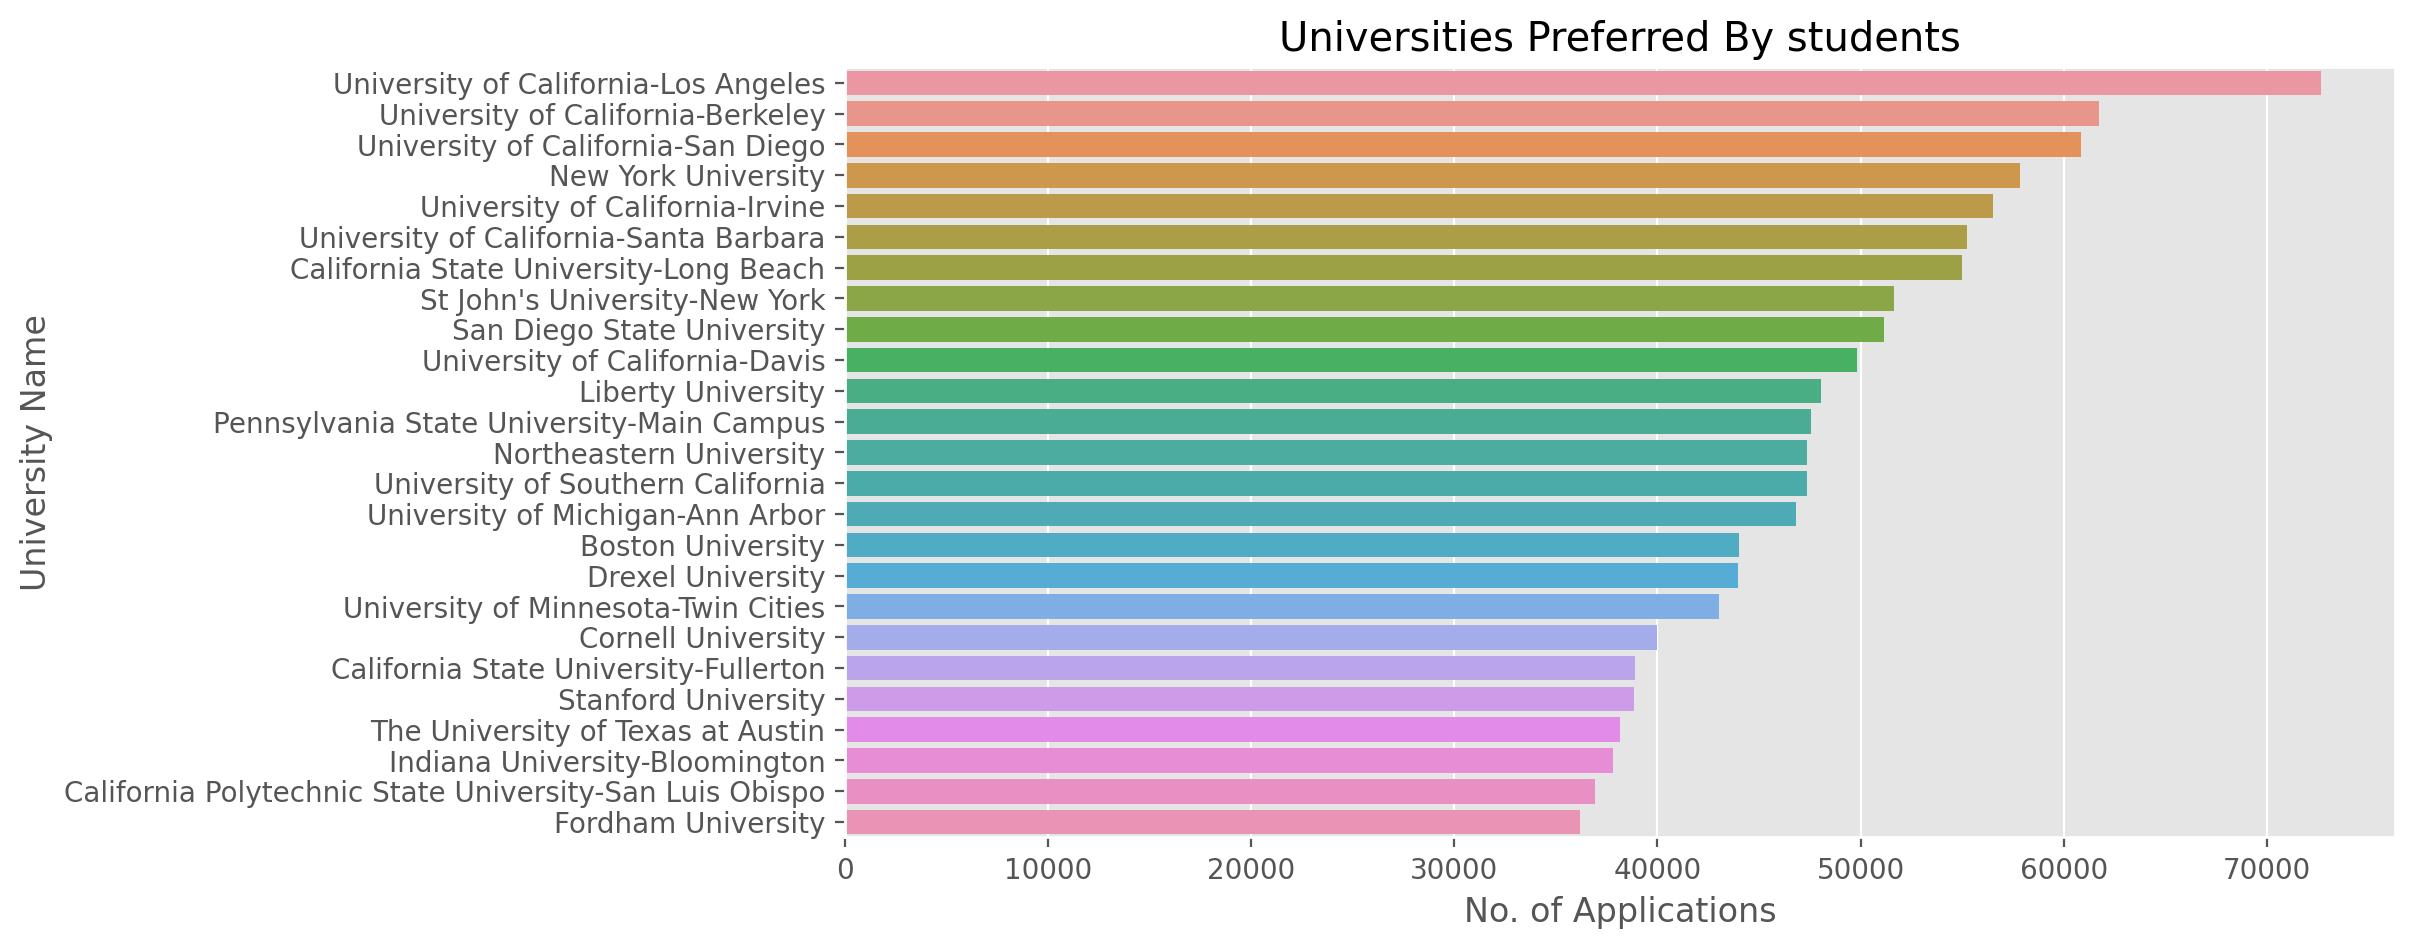

In [1338]:
plt.figure(figsize = (10,5), dpi = 200)
sns.barplot(y=top_uni.index, x=top_uni.values)
plt.title('Universities Preferred By students')
plt.xlabel('No. of Applications')
plt.ylabel('University Name')




**Insight** : 
- Seeing the no. of applications, we can say that more no of  applications will tell that they are preferred by the students.

But lets also see how many students enrolled.

<Axes: xlabel='Applicants total', ylabel='Enrolled total'>

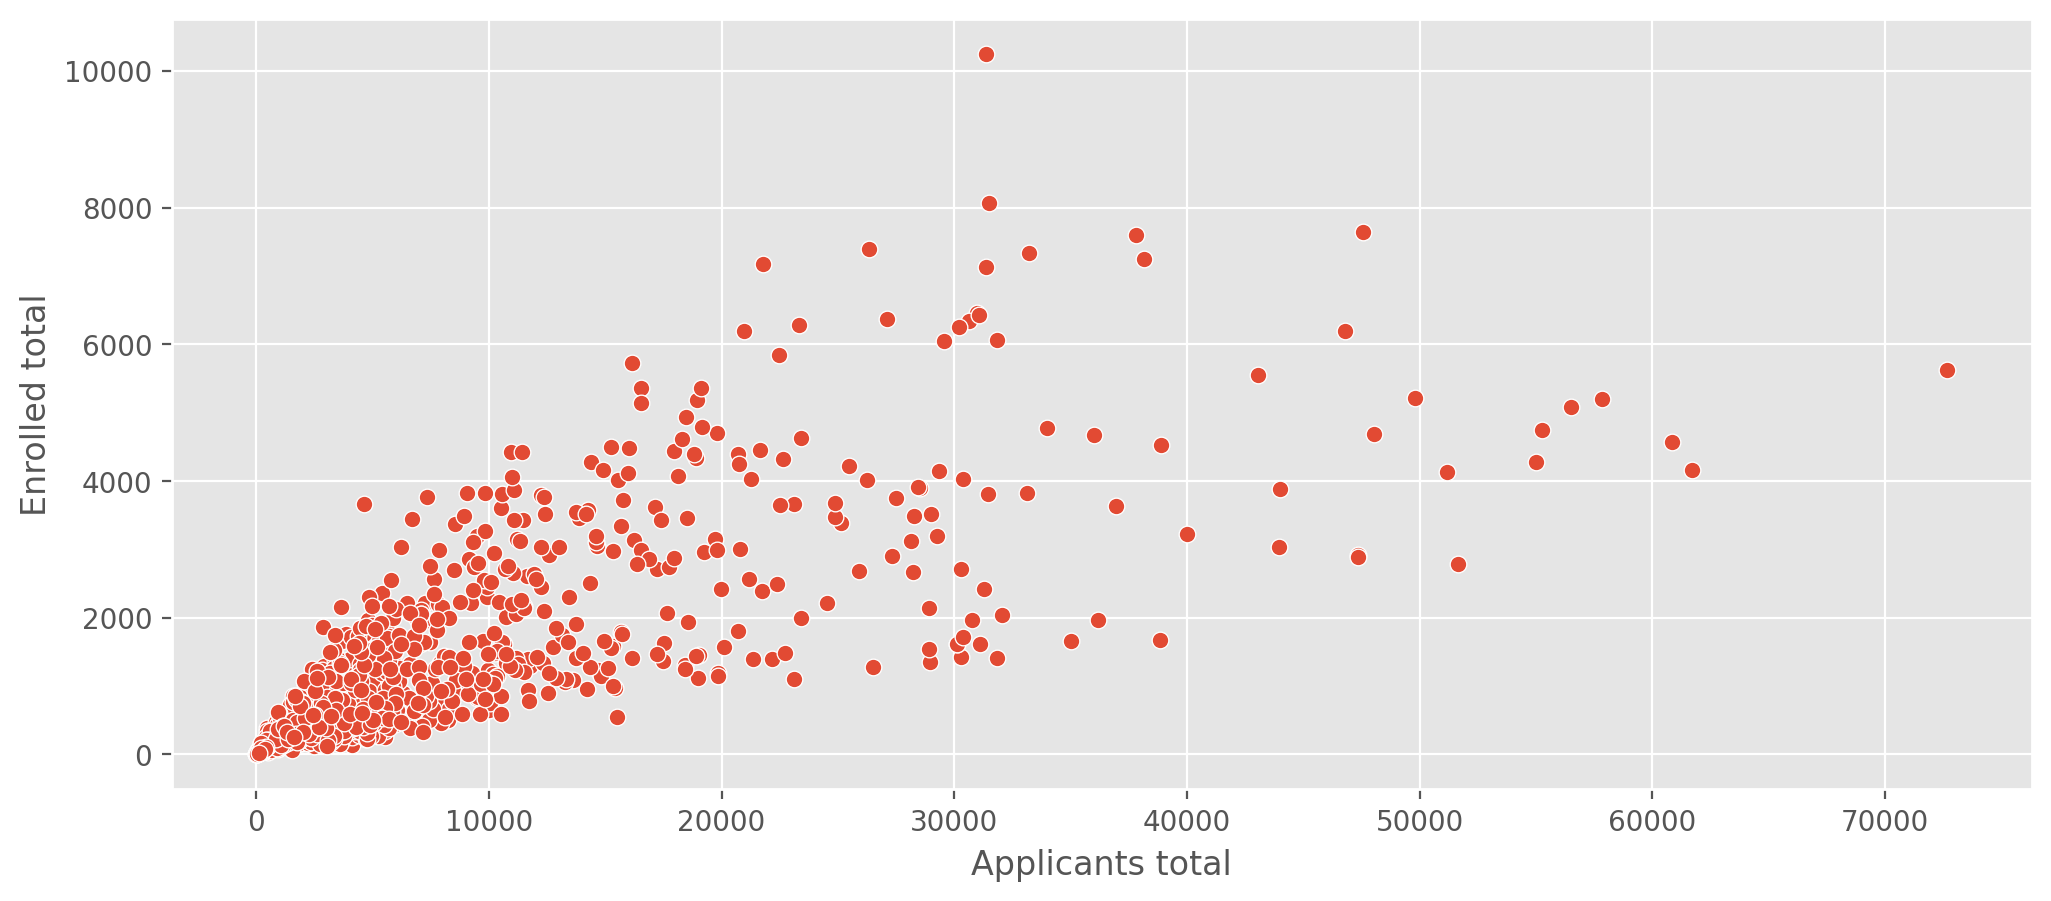

In [1339]:
plt.figure(figsize = (12,5), dpi = 200)
sns.scatterplot(x='Applicants total', y='Enrolled total', data = university_without_null)

**Insight** : 
- The above figure tells us that universities with less no. of applications have more enrollment. so we can say students preferred universities with less no. of applications.

Problem Statement 2.

Do students prefer universities that have a high rate of admission? in other words, do students prefer a university where it is easier for them to be admitted?

In [1340]:
#create a seperate dataframe with required columns for better analysis.

main_df=university_without_null[['Name','Applicants total','Admissions total','Enrolled total']]
main_df.head(3)

Name  Applicants total  Admissions total  \
0             Alabama A & M University            6142.0            5521.0   
1  University of Alabama at Birmingham            5689.0            4934.0   
2                   Amridge University               NaN               NaN   

   Enrolled total  
0          1104.0  
1          1773.0  
2             NaN

<Axes: ylabel='Enrolled total'>

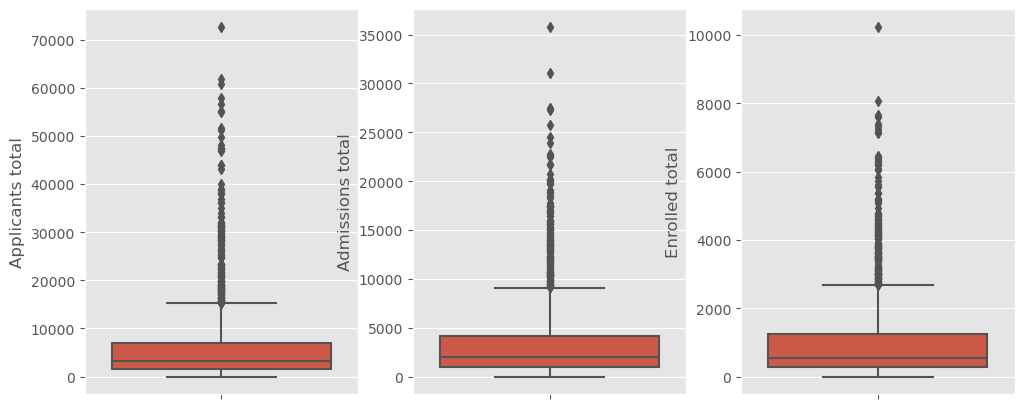

In [1341]:
#checking for outliers
plt.figure(figsize=(12,5),dpi=100)
plt.subplot(1,3,1)
sns.boxplot(y=main_df['Applicants total'])
plt.subplot(1,3,2)
sns.boxplot(y=main_df['Admissions total'])
plt.subplot(1,3,3)
sns.boxplot(y=main_df['Enrolled total'])

In [1342]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1534 non-null   object 
 1   Applicants total  1377 non-null   float64
 2   Admissions total  1377 non-null   float64
 3   Enrolled total    1377 non-null   float64
dtypes: float64(3), object(1)
memory usage: 48.1+ KB


In [1343]:
main_df.isnull().sum()

Name                  0
Applicants total    157
Admissions total    157
Enrolled total      157
dtype: int64

In [1344]:
#lets work on these null values for better visualization.
main_df[['Applicants total','Admissions total','Enrolled total']].mean()


Applicants total    6391.193174
Admissions total    3554.880174
Enrolled total      1043.046478
dtype: float64

In [1345]:
main_df[['Applicants total','Admissions total','Enrolled total']].median()


Applicants total    3350.0
Admissions total    2056.0
Enrolled total       538.0
dtype: float64

In [1346]:
main_df[['Applicants total','Admissions total','Enrolled total']].mode()

Applicants total  Admissions total  Enrolled total
0            1689.0             521.0           238.0
1               NaN               NaN           261.0
2               NaN               NaN           410.0

In [1347]:
main_df.describe()

Applicants total  Admissions total  Enrolled total
count       1377.000000       1377.000000     1377.000000
mean        6391.193174       3554.880174     1043.046478
std         8787.469171       4309.457606     1285.165519
min            0.000000          0.000000        0.000000
25%         1488.000000        950.000000      287.000000
50%         3350.000000       2056.000000      538.000000
75%         7016.000000       4203.000000     1246.000000
max        72676.000000      35815.000000    10241.000000

Here we have to replace null values. Also we can see 0 values which are incorrect. So we need to replace them as well.

In [1348]:
main_df['Applicants total']=main_df['Applicants total'].fillna(main_df['Applicants total'].median())
main_df['Admissions total']=main_df['Admissions total'].fillna(main_df['Admissions total'].median())
main_df['Enrolled total']=main_df['Enrolled total'].fillna(main_df['Enrolled total'].median())

main_df.head(20)

Name  Applicants total  Admissions total  \
0              Alabama A & M University            6142.0            5521.0   
1   University of Alabama at Birmingham            5689.0            4934.0   
2                    Amridge University            3350.0            2056.0   
3   University of Alabama in Huntsville            2054.0            1656.0   
4              Alabama State University           10245.0            5251.0   
5             The University of Alabama           30975.0           17515.0   
6               Athens State University            3350.0            2056.0   
7       Auburn University at Montgomery            1958.0            1639.0   
8                     Auburn University           15745.0           13027.0   
9           Birmingham Southern College            1931.0            1240.0   
10            Concordia College Alabama            3350.0            2056.0   
11                  Faulkner University            3350.0            2056.0   
12                   Huntingdon College            1470.0             923.0   
13        Jacksonville State University            3083.0            2567.0   
14                       Judson College             268.0             198.0   
15           University of West Alabama             462.0             460.0   
16                        Miles College            3350.0            2056.0   
17                 University of Mobile             866.0             617.0   
18             University of Montevallo            1385.0            1209.0   
19          University of North Alabama            2542.0            2057.0   

    Enrolled total  
0           1104.0  
1           1773.0  
2            538.0  
3            651.0  
4           1479.0  
5           6454.0  
6            538.0  
7            579.0  
8           3726.0  
9            356.0  
10           538.0  
11           538.0  
12           261.0  
13          1158.0  
14            68.0  
15           380.0  
16           538.0  
17           259.0  
18           531.0  
19           970.0

In [1349]:
main_df['Applicants total']=main_df['Applicants total'].replace(0.0,main_df['Applicants total'].median())
main_df['Admissions total']=main_df['Admissions total'].replace(0.0,main_df['Admissions total'].median())
main_df['Enrolled total']=main_df['Enrolled total'].replace(0.0,main_df['Enrolled total'].median())
main_df.sort_values(by='Enrolled total').head(20)

Name  Applicants total  \
1343                                    Goddard College               4.0   
1500  Trine University-Regional/Non-Traditional Camp...              33.0   
331                                      Shimer College              28.0   
1046                              Marylhurst University              36.0   
195                      Carlos Albizu University-Miami              58.0   
396                  Maharishi University of Management              74.0   
1532                       Providence Christian College             122.0   
1354                                   Sterling College              49.0   
105                          American Jewish University             100.0   
1479                                Brandman University              34.0   
316                           National Louis University              84.0   
67                     Alliant International University             128.0   
1476                         Antioch University-Seattle              42.0   
1352                               College of St Joseph             183.0   
31                            Alaska Pacific University             494.0   
1222                                    Aquinas College             119.0   
941                   Mid-Atlantic Christian University             168.0   
614                                      Kuyper College             152.0   
155                                   Naropa University              79.0   
1452             Silver Lake College of the Holy Family             170.0   

      Admissions total  Enrolled total  
1343               4.0             2.0  
1500              10.0             7.0  
331                8.0             8.0  
1046              14.0             8.0  
195               21.0            16.0  
396               31.0            19.0  
1532              65.0            20.0  
1354              46.0            20.0  
105               59.0            23.0  
1479              34.0            24.0  
316               83.0            25.0  
67                63.0            28.0  
1476              33.0            30.0  
1352             125.0            33.0  
31               185.0            33.0  
1222              62.0            36.0  
941               69.0            37.0  
614              104.0            37.0  
155               63.0            38.0  
1452             102.0            40.0

In [1350]:
university_without_null['Applicants total'].sort_values()

99       0.0
1343     4.0
331     28.0
1500    33.0
1479    34.0
        ... 
1526     NaN
1527     NaN
1528     NaN
1531     NaN
1533     NaN
Name: Applicants total, Length: 1534, dtype: float64

In [1351]:
main_df['Applicants total'].sort_values()

1343        4.0
331        28.0
1500       33.0
1479       34.0
1046       36.0
         ...   
83      56515.0
841     57845.0
86      60832.0
81      61717.0
84      72676.0
Name: Applicants total, Length: 1534, dtype: float64

In [1352]:
main_df['Enrollment rate']=((main_df['Enrolled total']/main_df['Admissions total'])*100).round(2)

main_df['Admissions rate']=((main_df['Admissions total']/main_df['Applicants total'])*100).round(2)

main_df.head(5)

Name  Applicants total  Admissions total  \
0             Alabama A & M University            6142.0            5521.0   
1  University of Alabama at Birmingham            5689.0            4934.0   
2                   Amridge University            3350.0            2056.0   
3  University of Alabama in Huntsville            2054.0            1656.0   
4             Alabama State University           10245.0            5251.0   

   Enrolled total  Enrollment rate  Admissions rate  
0          1104.0            20.00            89.89  
1          1773.0            35.93            86.73  
2           538.0            26.17            61.37  
3           651.0            39.31            80.62  
4          1479.0            28.17            51.25

<Axes: xlabel='Applicants total', ylabel='Admissions total'>

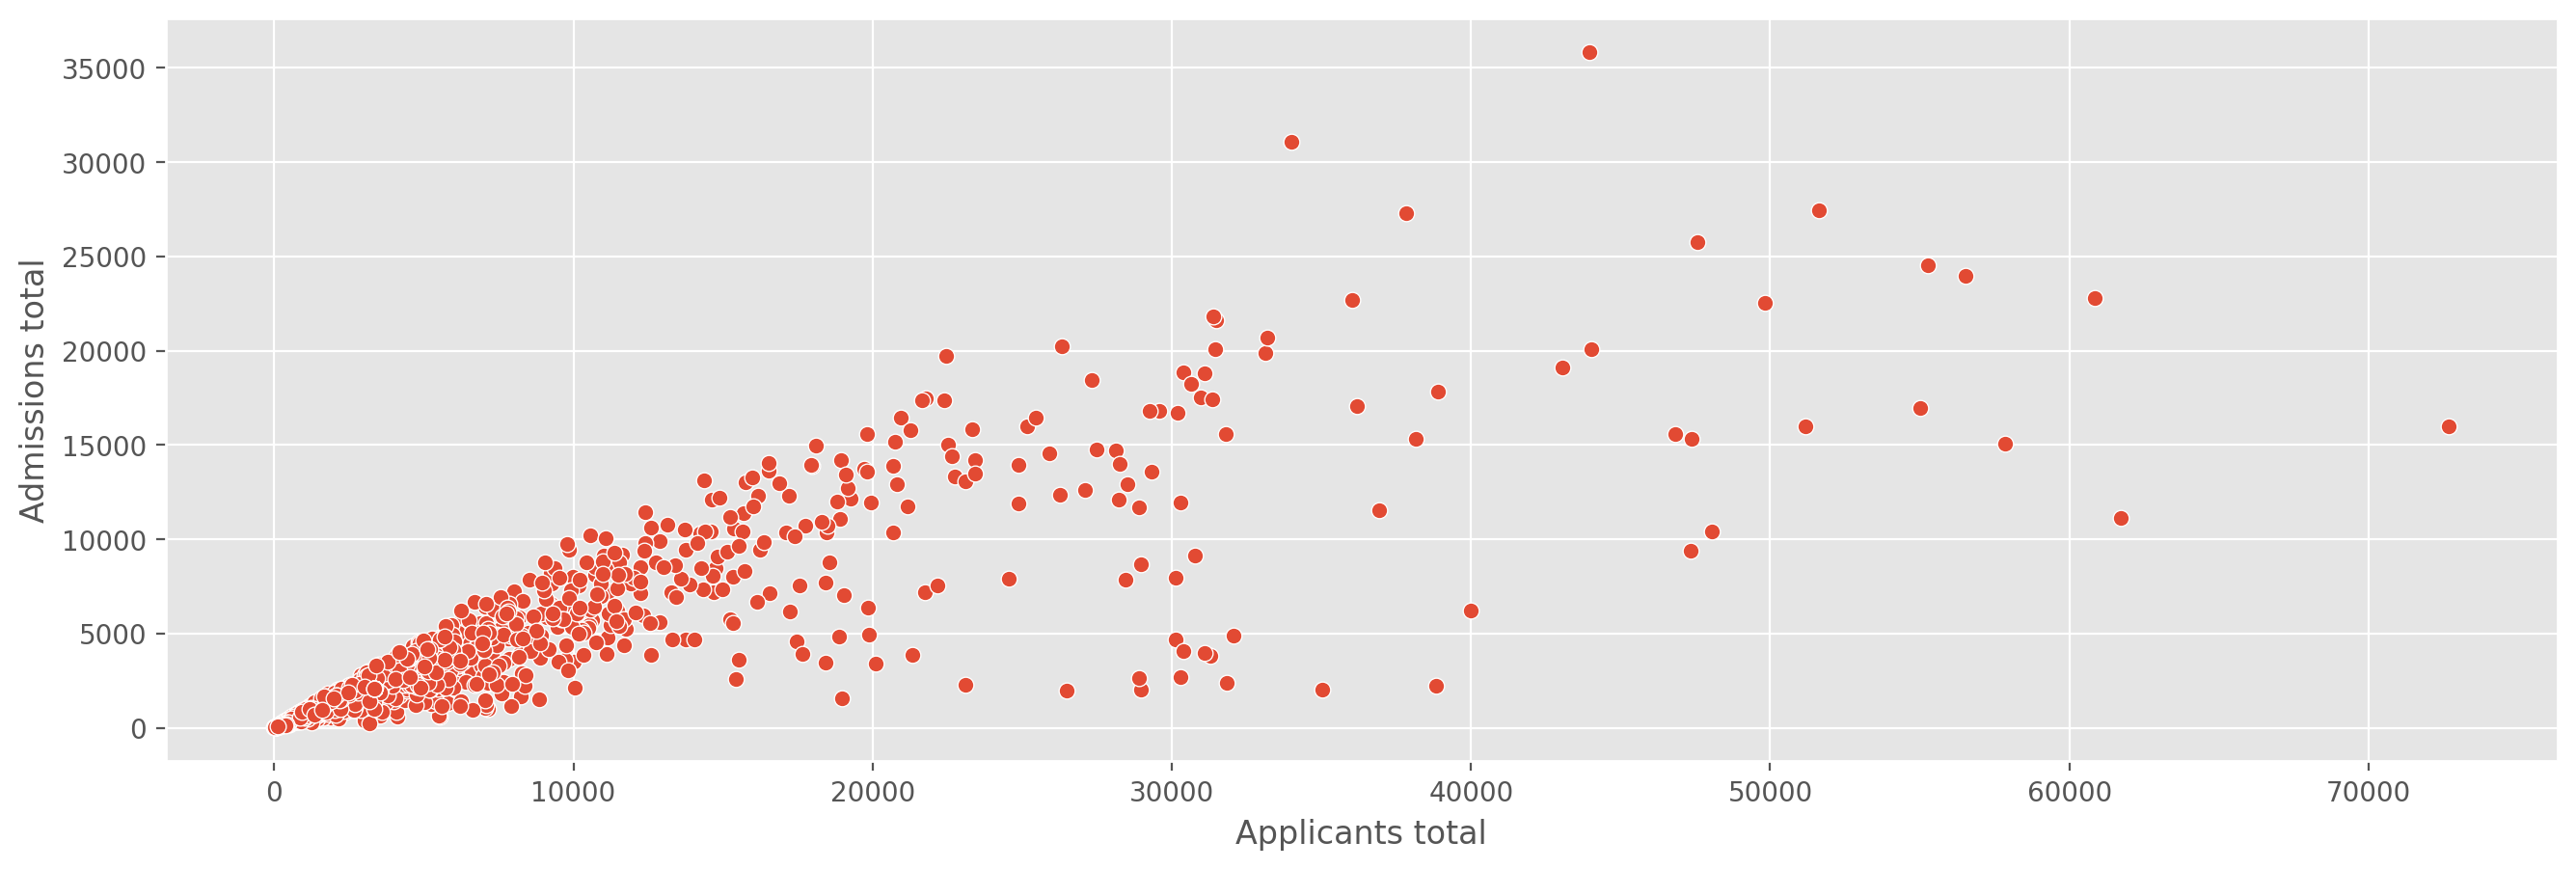

In [1353]:
plt.figure(figsize = (16,5), dpi = 200)
sns.scatterplot(y='Admissions total', x='Applicants total', data = main_df)

The above figure tells us that universities with less applications, have more admissions

<Axes: xlabel='Admissions rate', ylabel='Enrollment rate'>

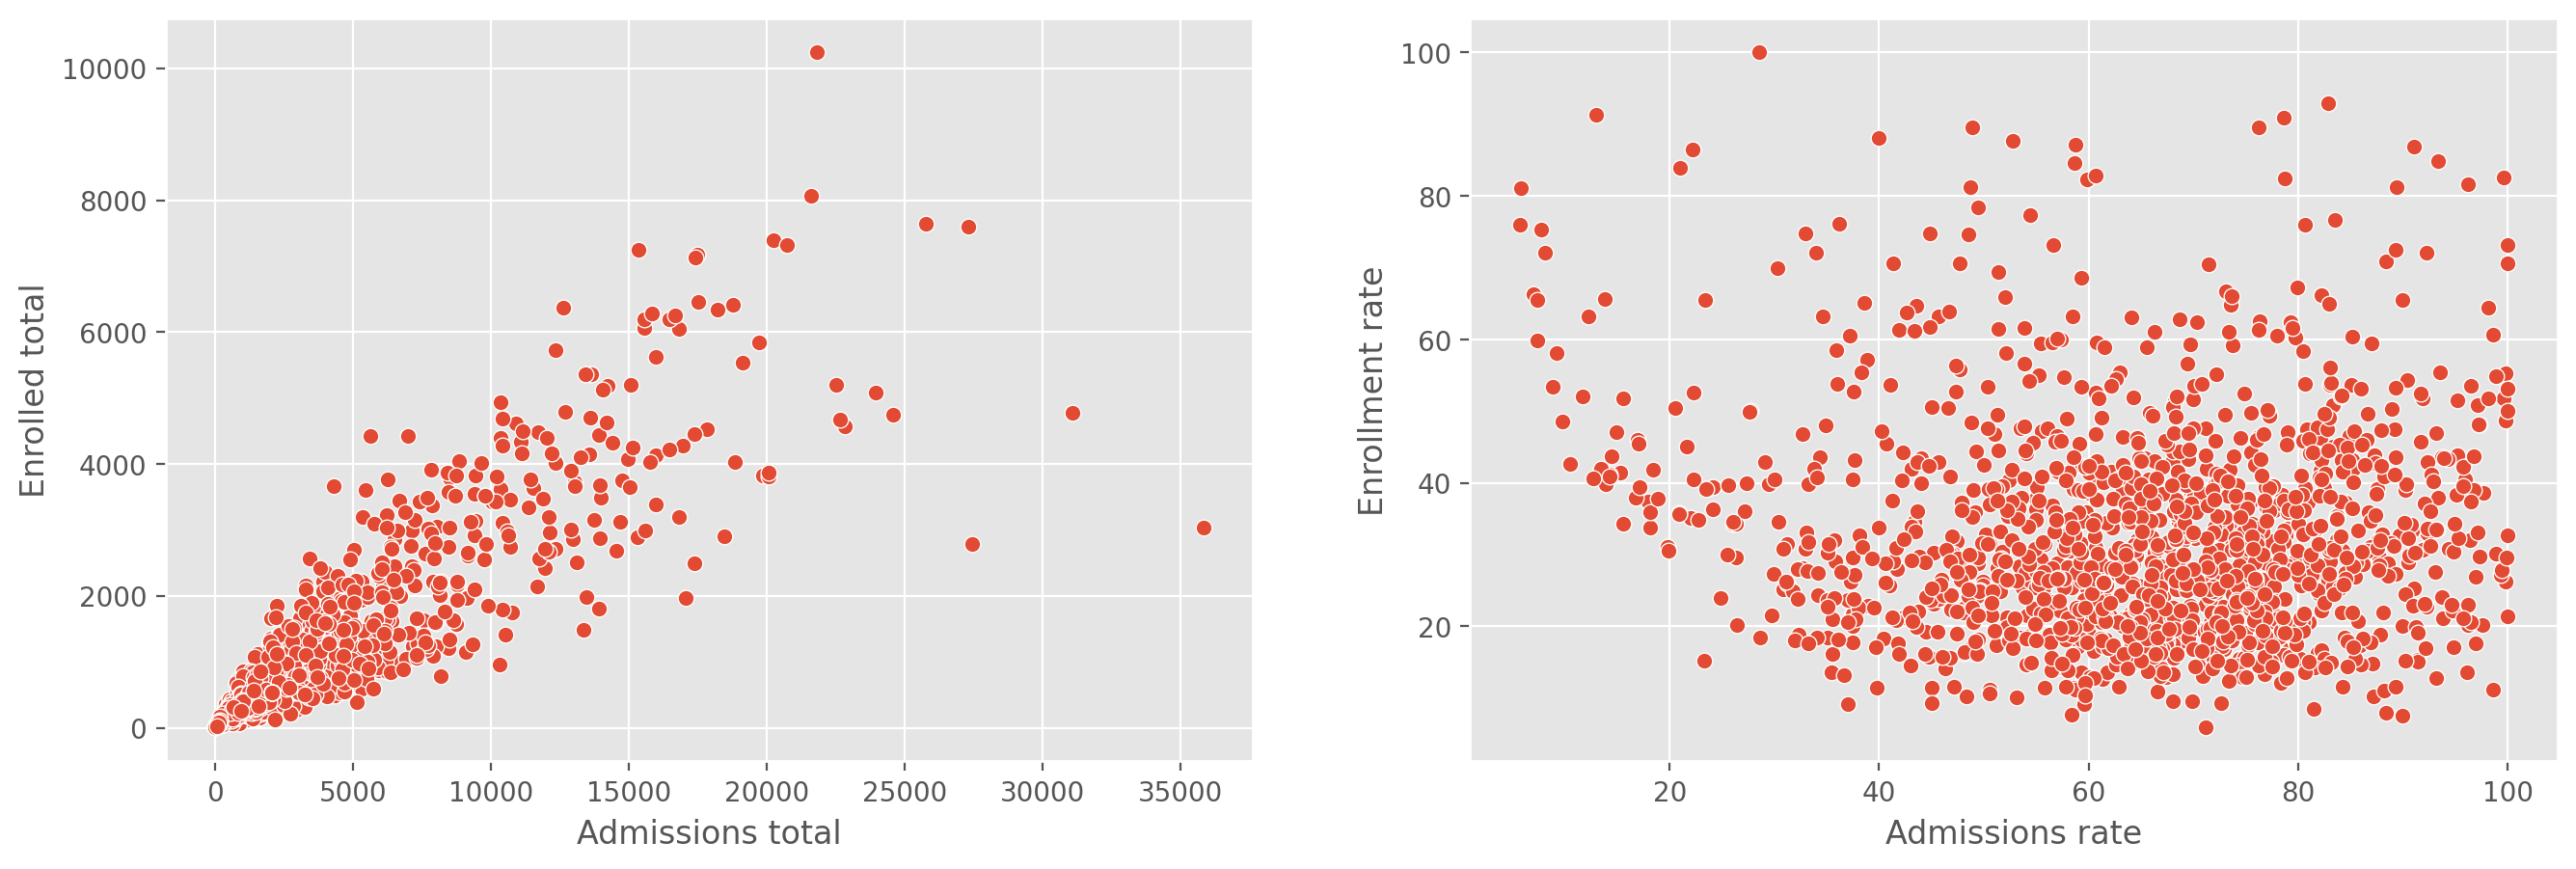

In [1354]:
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.scatterplot(x='Admissions total', y='Enrolled total', data = main_df)
plt.subplot(1,2,2)
sns.scatterplot(x='Admissions rate', y='Enrollment rate', data = main_df)




In [1355]:
main_df.sort_values(by='Enrollment rate',ascending=False)[:20]

Name  Applicants total  \
331                                      Shimer College              28.0   
1484                                  Hodges University             221.0   
690                               College of the Ozarks            3006.0   
1476                         Antioch University-Seattle              42.0   
1485                  Remington College-Honolulu Campus              63.0   
475                  Southern University at New Orleans            1563.0   
342                     Calumet College of Saint Joseph             545.0   
40                University of Arkansas at Little Rock            1443.0   
204                                     Florida College             383.0   
1490                              Everglades University              67.0   
682                             Missouri Valley College            2164.0   
213                     Keiser University-Ft Lauderdale            4620.0   
892                                       Touro College            1732.0   
324                   Robert Morris University Illinois            4080.0   
1509  San Diego State University-Imperial Valley Campus             201.0   
15                           University of West Alabama             462.0   
1424                                Marshall University            2866.0   
1026             Northwestern Oklahoma State University             888.0   
628                               Martin Luther College             209.0   
951                          Dickinson State University             417.0   

      Admissions total  Enrolled total  Enrollment rate  Admissions rate  
331                8.0             8.0           100.00            28.57  
1484             183.0           170.0            92.90            82.81  
690              391.0           357.0            91.30            13.01  
1476              33.0            30.0            90.91            78.57  
1485              48.0            43.0            89.58            76.19  
475              764.0           684.0            89.53            48.88  
342              218.0           192.0            88.07            40.00  
40               761.0           667.0            87.65            52.74  
204              225.0           196.0            87.11            58.75  
1490              61.0            53.0            86.89            91.04  
682              480.0           415.0            86.46            22.18  
213             4311.0          3658.0            84.85            93.31  
892             1016.0           859.0            84.55            58.66  
324              857.0           719.0            83.90            21.00  
1509             122.0           101.0            82.79            60.70  
15               460.0           380.0            82.61            99.57  
1424            2255.0          1858.0            82.39            78.68  
1026             531.0           437.0            82.30            59.80  
628              201.0           164.0            81.59            96.17  
951              203.0           165.0            81.28            48.68

**Insight** :

- By seeing the visualizations, we see that more applications does not mean more admissions. ANd more admission doesnot mean more enrollment. So we cannot say that students prefer the universities with more admission rate. Students did not prefer a university where it is easier for them to be admitted!

I am not seeing Harward and cambridge here.. Strange. Lets find out if its there. If its there what is the status.

In [1356]:
for i in university_without_null['Name'].unique():
    print(i)
    

Alabama A & M University
University of Alabama at Birmingham
Amridge University
University of Alabama in Huntsville
Alabama State University
The University of Alabama
Athens State University
Auburn University at Montgomery
Auburn University
Birmingham Southern College
Concordia College Alabama
Faulkner University
Huntingdon College
Jacksonville State University
Judson College
University of West Alabama
Miles College
University of Mobile
University of Montevallo
University of North Alabama
Oakwood University
Samford University
University of South Alabama
Spring Hill College
Stillman College
Talladega College
Troy University
Tuskegee University
University of Alaska Anchorage
University of Alaska Fairbanks
University of Alaska Southeast
Alaska Pacific University
American Indian College of the Assemblies of God Inc
Arizona State University-Tempe
University of Arizona
Embry-Riddle Aeronautical University-Prescott
Northern Arizona University
Ottawa University-Phoenix
Prescott College
Arizona

In [1357]:
main_df[main_df['Name']=='Harvard University']

Name  Applicants total  Admissions total  Enrolled total  \
544  Harvard University           35023.0            2047.0          1659.0   

     Enrollment rate  Admissions rate  
544            81.05             5.84

So  we can see here that Harvard has less applications than the 20 universities we had found earlier.

Problem Statement 3
- Do students prefer public or private universities?!



In [1358]:
university_without_null['Control of institution']

0                       Public
1                       Public
2       Private not-for-profit
3                       Public
4                       Public
                 ...          
1529                    Public
1530    Private not-for-profit
1531    Private not-for-profit
1532    Private not-for-profit
1533    Private not-for-profit
Name: Control of institution, Length: 1534, dtype: object

In [1359]:
university_without_null.groupby(['Name','Control of institution'])['Applicants total'].max().sort_values(ascending=False)[:30]

Name                                                     Control of institution
University of California-Los Angeles                     Public                    72676.0
University of California-Berkeley                        Public                    61717.0
University of California-San Diego                       Public                    60832.0
New York University                                      Private not-for-profit    57845.0
University of California-Irvine                          Public                    56515.0
University of California-Santa Barbara                   Public                    55258.0
California State University-Long Beach                   Public                    55019.0
St John's University-New York                            Private not-for-profit    51634.0
San Diego State University                               Public                    51163.0
University of California-Davis                           Public                    49820.0
Liberty Un

In [1360]:
university_without_null['Control of institution'].value_counts()

Private not-for-profit    971
Public                    563
Name: Control of institution, dtype: int64

In [1361]:
uni_control_of_insti=university_without_null[['Name','Control of institution','Applicants total','Enrolled total']].sort_values(by='Applicants total',ascending=False)[:20]
uni_control_of_insti

Name  Control of institution  \
84         University of California-Los Angeles                  Public   
81            University of California-Berkeley                  Public   
86           University of California-San Diego                  Public   
841                         New York University  Private not-for-profit   
83              University of California-Irvine                  Public   
87       University of California-Santa Barbara                  Public   
77       California State University-Long Beach                  Public   
863               St John's University-New York  Private not-for-profit   
126                  San Diego State University                  Public   
82               University of California-Davis                  Public   
1371                         Liberty University  Private not-for-profit   
1133  Pennsylvania State University-Main Campus                  Public   
559                     Northeastern University  Private not-for-profit   
137           University of Southern California  Private not-for-profit   
605            University of Michigan-Ann Arbor                  Public   
529                           Boston University  Private not-for-profit   
1080                          Drexel University  Private not-for-profit   
634         University of Minnesota-Twin Cities                  Public   
796                          Cornell University  Private not-for-profit   
75        California State University-Fullerton                  Public   

      Applicants total  Enrolled total  
84             72676.0          5620.0  
81             61717.0          4162.0  
86             60832.0          4575.0  
841            57845.0          5207.0  
83             56515.0          5077.0  
87             55258.0          4741.0  
77             55019.0          4276.0  
863            51634.0          2792.0  
126            51163.0          4139.0  
82             49820.0          5208.0  
1371           48054.0          4690.0  
1133           47552.0          7649.0  
559            47364.0          2891.0  
137            47358.0          2922.0  
605            46813.0          6200.0  
529            44006.0          3877.0  
1080           43945.0          3040.0  
634            43048.0          5544.0  
796            39999.0          3223.0  
75             38909.0          4526.0

<Axes: xlabel='Control of institution', ylabel='Enrolled total'>

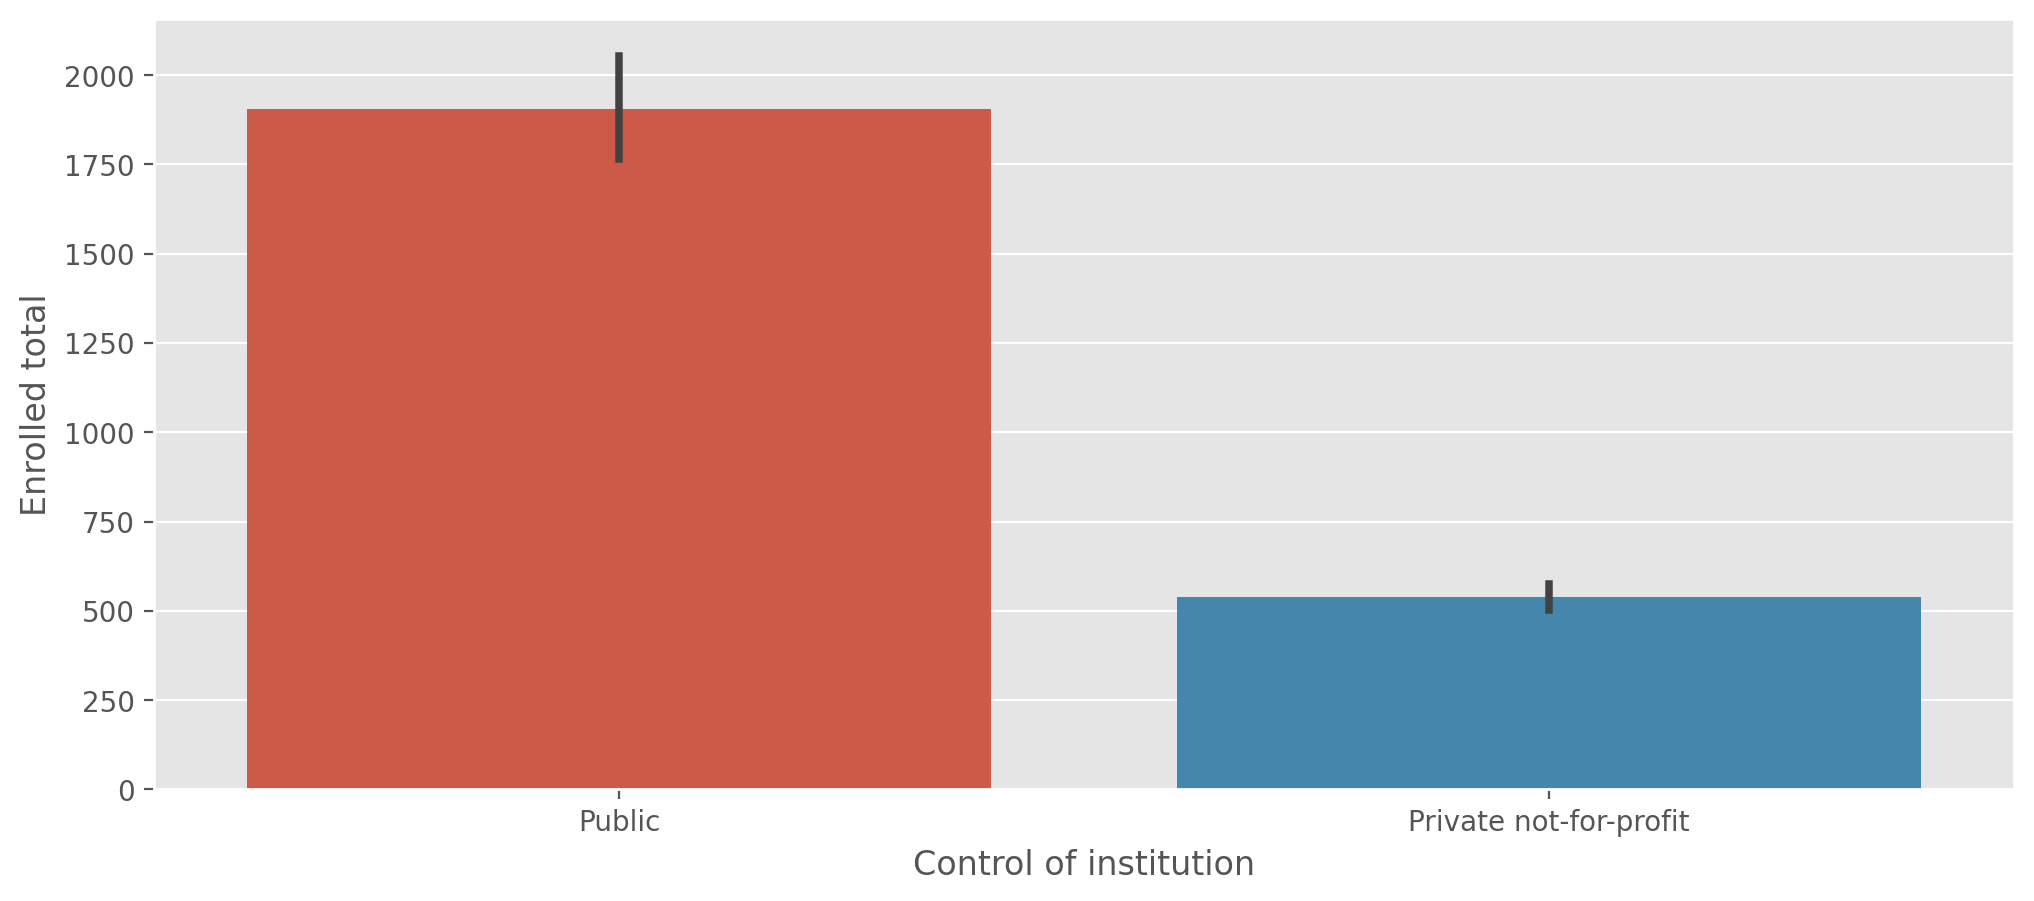

In [1362]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(y=university_without_null['Enrolled total'],x=university_without_null['Control of institution'])

<Axes: xlabel='Control of institution', ylabel='Applicants total'>

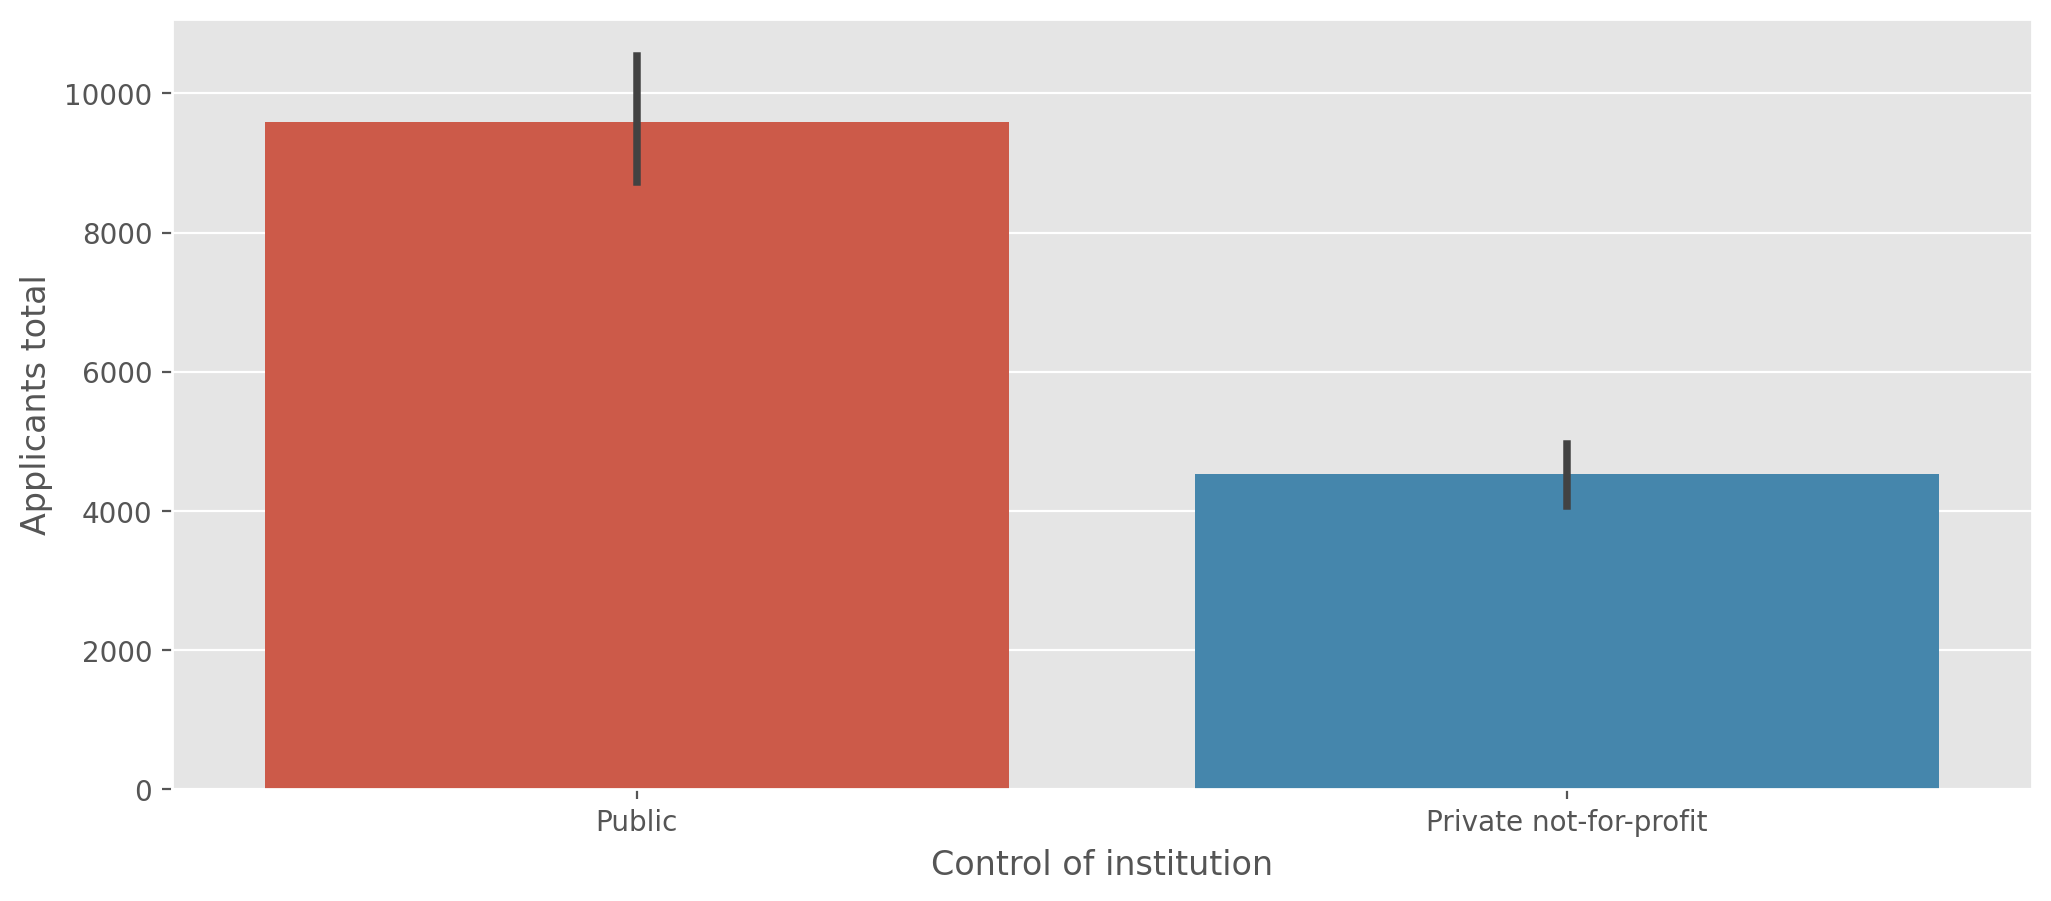

In [1363]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(y=university_without_null['Applicants total'],x=university_without_null['Control of institution'])

<Axes: xlabel='Applicants total', ylabel='Name'>

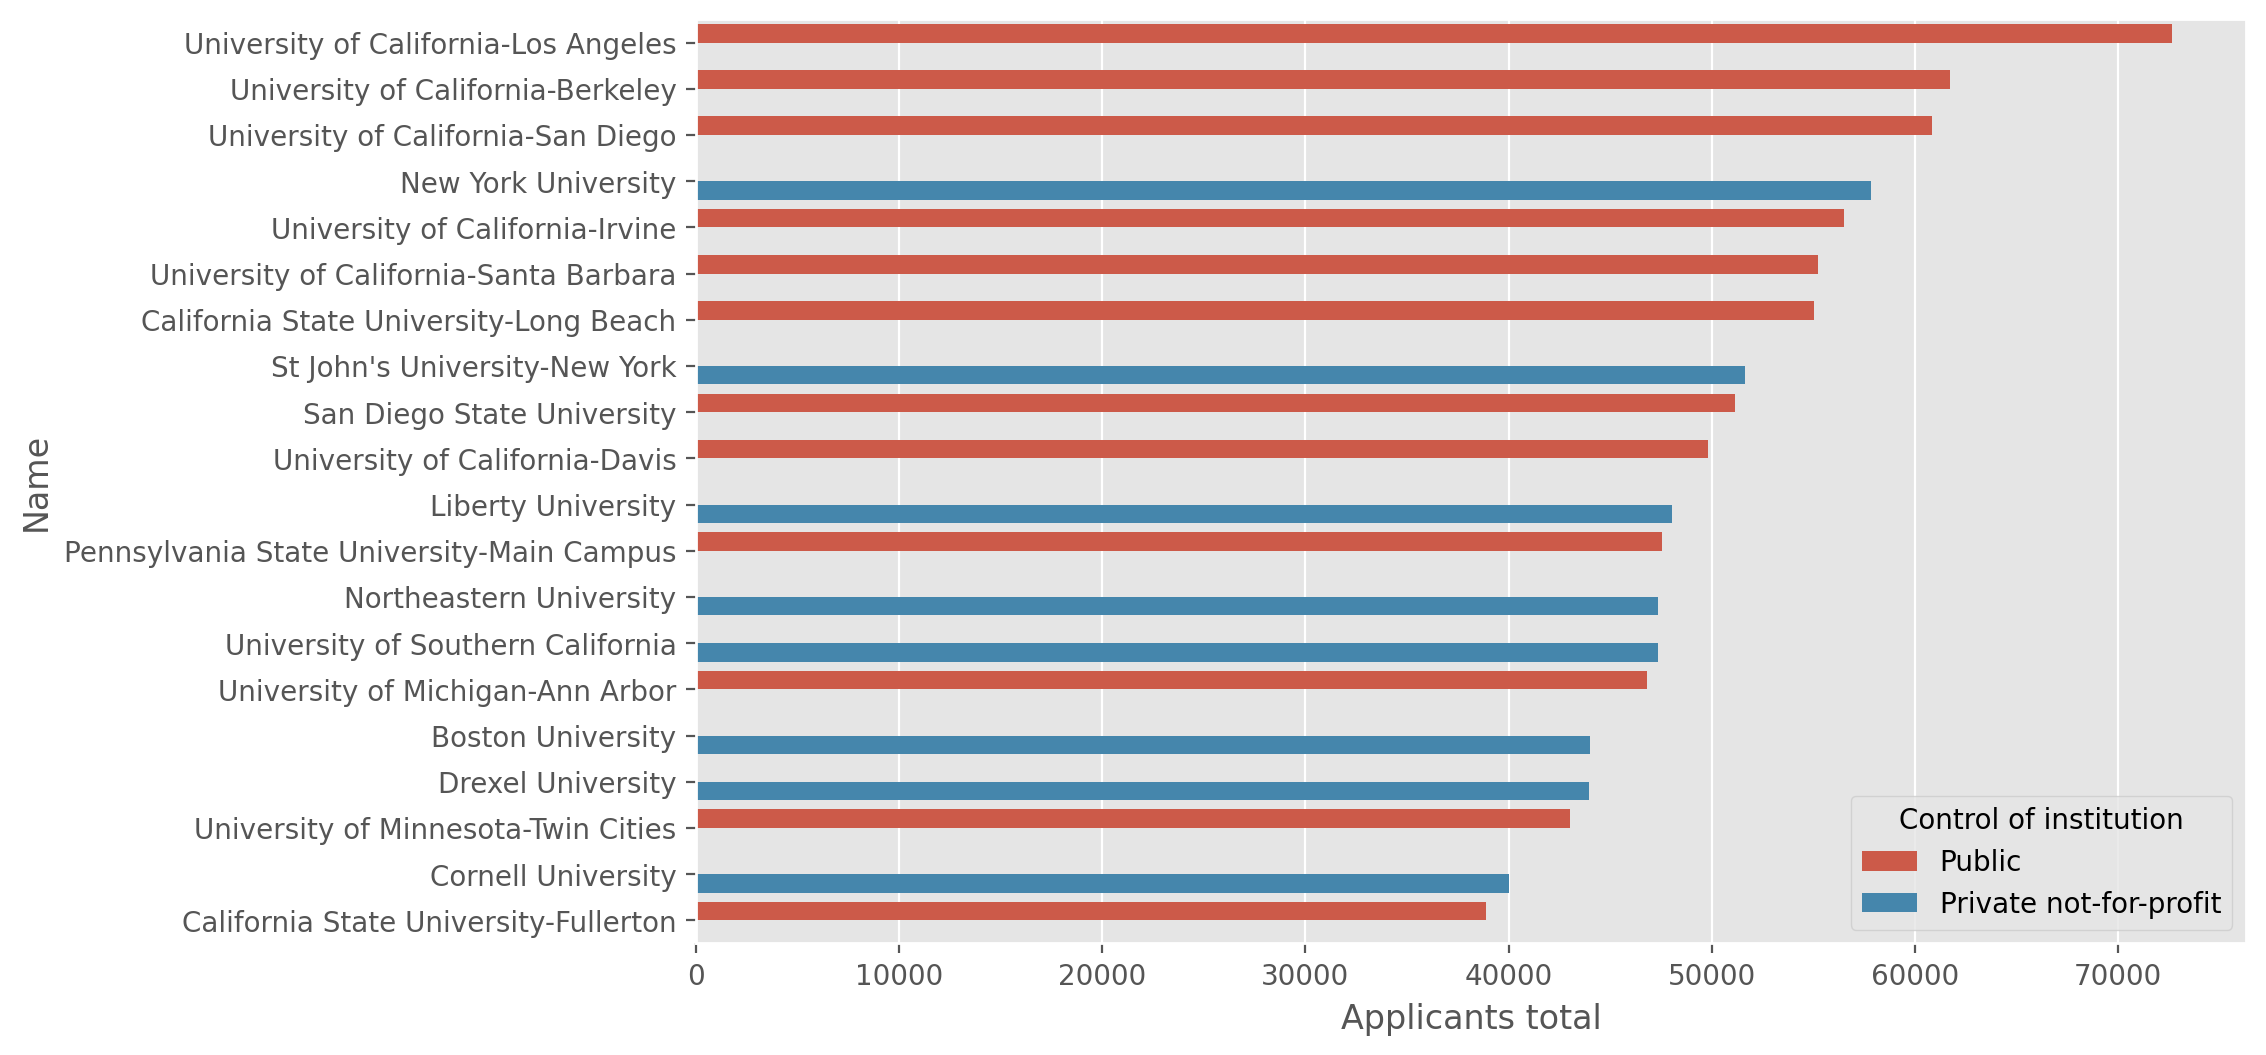

In [1364]:
plt.figure(figsize = (10,6), dpi = 200)
sns.barplot(y='Name', x='Applicants total',hue='Control of institution',data=uni_control_of_insti)

**Insight** 
- By looking at the above visualizations, we can say that students prefer public universities.

**Problem statement 4**
- Do students prefer universities with low tuition and fees?!

In [1365]:
uni_fees=pd.concat([main_df,university_without_null['Tuition and fees, 2013-14']],axis=1)
uni_fees

Name  Applicants total  \
0                          Alabama A & M University            6142.0   
1               University of Alabama at Birmingham            5689.0   
2                                Amridge University            3350.0   
3               University of Alabama in Huntsville            2054.0   
4                          Alabama State University           10245.0   
...                                             ...               ...   
1529   University of South Florida-Sarasota-Manatee             393.0   
1530                           The Kingâ€™s College            3033.0   
1531                       Ottawa University-Online            3350.0   
1532                   Providence Christian College             122.0   
1533  Polytechnic University of Puerto Rico-Orlando            3350.0   

      Admissions total  Enrolled total  Enrollment rate  Admissions rate  \
0               5521.0          1104.0            20.00            89.89   
1               4934.0          1773.0            35.93            86.73   
2               2056.0           538.0            26.17            61.37   
3               1656.0           651.0            39.31            80.62   
4               5251.0          1479.0            28.17            51.25   
...                ...             ...              ...              ...   
1529             136.0            86.0            63.24            34.61   
1530            2158.0           127.0             5.89            71.15   
1531            2056.0           538.0            26.17            61.37   
1532              65.0            20.0            30.77            53.28   
1533            2056.0           538.0            26.17            61.37   

      Tuition and fees, 2013-14  
0                        7182.0  
1                        7206.0  
2                        6870.0  
3                        9192.0  
4                        8720.0  
...                         ...  
1529                     5587.0  
1530                    31300.0  
1531                        NaN  
1532                    24222.0  
1533                    10920.0  

[1534 rows x 7 columns]

<Axes: ylabel='Tuition and fees, 2013-14'>

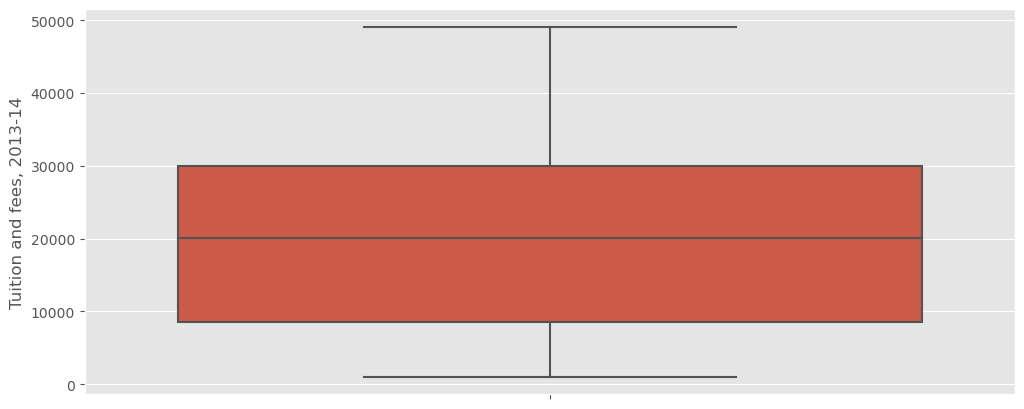

In [1366]:
plt.figure(figsize=(12,5),dpi=100)
sns.boxplot(y=uni_fees['Tuition and fees, 2013-14'])

In [1367]:
uni_fees.isnull().sum()

Name                          0
Applicants total              0
Admissions total              0
Enrolled total                0
Enrollment rate               0
Admissions rate               0
Tuition and fees, 2013-14    37
dtype: int64

In [1368]:
uni_fees.describe()

Applicants total  Admissions total  Enrolled total  Enrollment rate  \
count       1534.000000       1534.000000     1534.000000      1534.000000   
mean        6082.120600       3402.814863      991.707301        32.352555   
std         8375.099173       4107.265358     1226.964181        14.350324   
min            4.000000          4.000000        2.000000         5.890000   
25%         1642.000000       1029.750000      315.000000        23.075000   
50%         3350.000000       2056.000000      538.000000        28.400000   
75%         6138.000000       3811.000000     1103.750000        39.185000   
max        72676.000000      35815.000000    10241.000000       100.000000   

       Admissions rate  Tuition and fees, 2013-14  
count      1534.000000                1497.000000  
mean         64.240489               20727.490314  
std          17.745917               12455.805360  
min           5.690000                1032.000000  
25%          55.670000                8542.000000  
50%          64.060000               20060.000000  
75%          76.177500               29992.000000  
max         100.000000               49138.000000

In [1369]:
uni_fees['Tuition and fees, 2013-14'].head(25)

0      7182.0
1      7206.0
2      6870.0
3      9192.0
4      8720.0
5      9450.0
6         NaN
7      8750.0
8      9852.0
9     30690.0
10     8090.0
11    18230.0
12    23500.0
13     7092.0
14    15630.0
15     7660.0
16    11454.0
17    18690.0
18    10000.0
19     7078.0
20    16234.0
21    26328.0
22     6948.0
23    30924.0
24    15901.0
Name: Tuition and fees, 2013-14, dtype: float64

As there are no outliers, lets replace the null values by mean.

In [1370]:
uni_fees['Tuition and fees, 2013-14'].fillna(round(uni_fees['Tuition and fees, 2013-14'].mean(),1),inplace=True)
uni_fees.head(7)

Name  Applicants total  Admissions total  \
0             Alabama A & M University            6142.0            5521.0   
1  University of Alabama at Birmingham            5689.0            4934.0   
2                   Amridge University            3350.0            2056.0   
3  University of Alabama in Huntsville            2054.0            1656.0   
4             Alabama State University           10245.0            5251.0   
5            The University of Alabama           30975.0           17515.0   
6              Athens State University            3350.0            2056.0   

   Enrolled total  Enrollment rate  Admissions rate  Tuition and fees, 2013-14  
0          1104.0            20.00            89.89                     7182.0  
1          1773.0            35.93            86.73                     7206.0  
2           538.0            26.17            61.37                     6870.0  
3           651.0            39.31            80.62                     9192.0  
4          1479.0            28.17            51.25                     8720.0  
5          6454.0            36.85            56.55                     9450.0  
6           538.0            26.17            61.37                    20727.5

In [1371]:
uni_fees['Tuition and fees, 2013-14']=round(uni_fees['Tuition and fees, 2013-14'],1)
uni_fees.head(7)

Name  Applicants total  Admissions total  \
0             Alabama A & M University            6142.0            5521.0   
1  University of Alabama at Birmingham            5689.0            4934.0   
2                   Amridge University            3350.0            2056.0   
3  University of Alabama in Huntsville            2054.0            1656.0   
4             Alabama State University           10245.0            5251.0   
5            The University of Alabama           30975.0           17515.0   
6              Athens State University            3350.0            2056.0   

   Enrolled total  Enrollment rate  Admissions rate  Tuition and fees, 2013-14  
0          1104.0            20.00            89.89                     7182.0  
1          1773.0            35.93            86.73                     7206.0  
2           538.0            26.17            61.37                     6870.0  
3           651.0            39.31            80.62                     9192.0  
4          1479.0            28.17            51.25                     8720.0  
5          6454.0            36.85            56.55                     9450.0  
6           538.0            26.17            61.37                    20727.5

<Axes: >

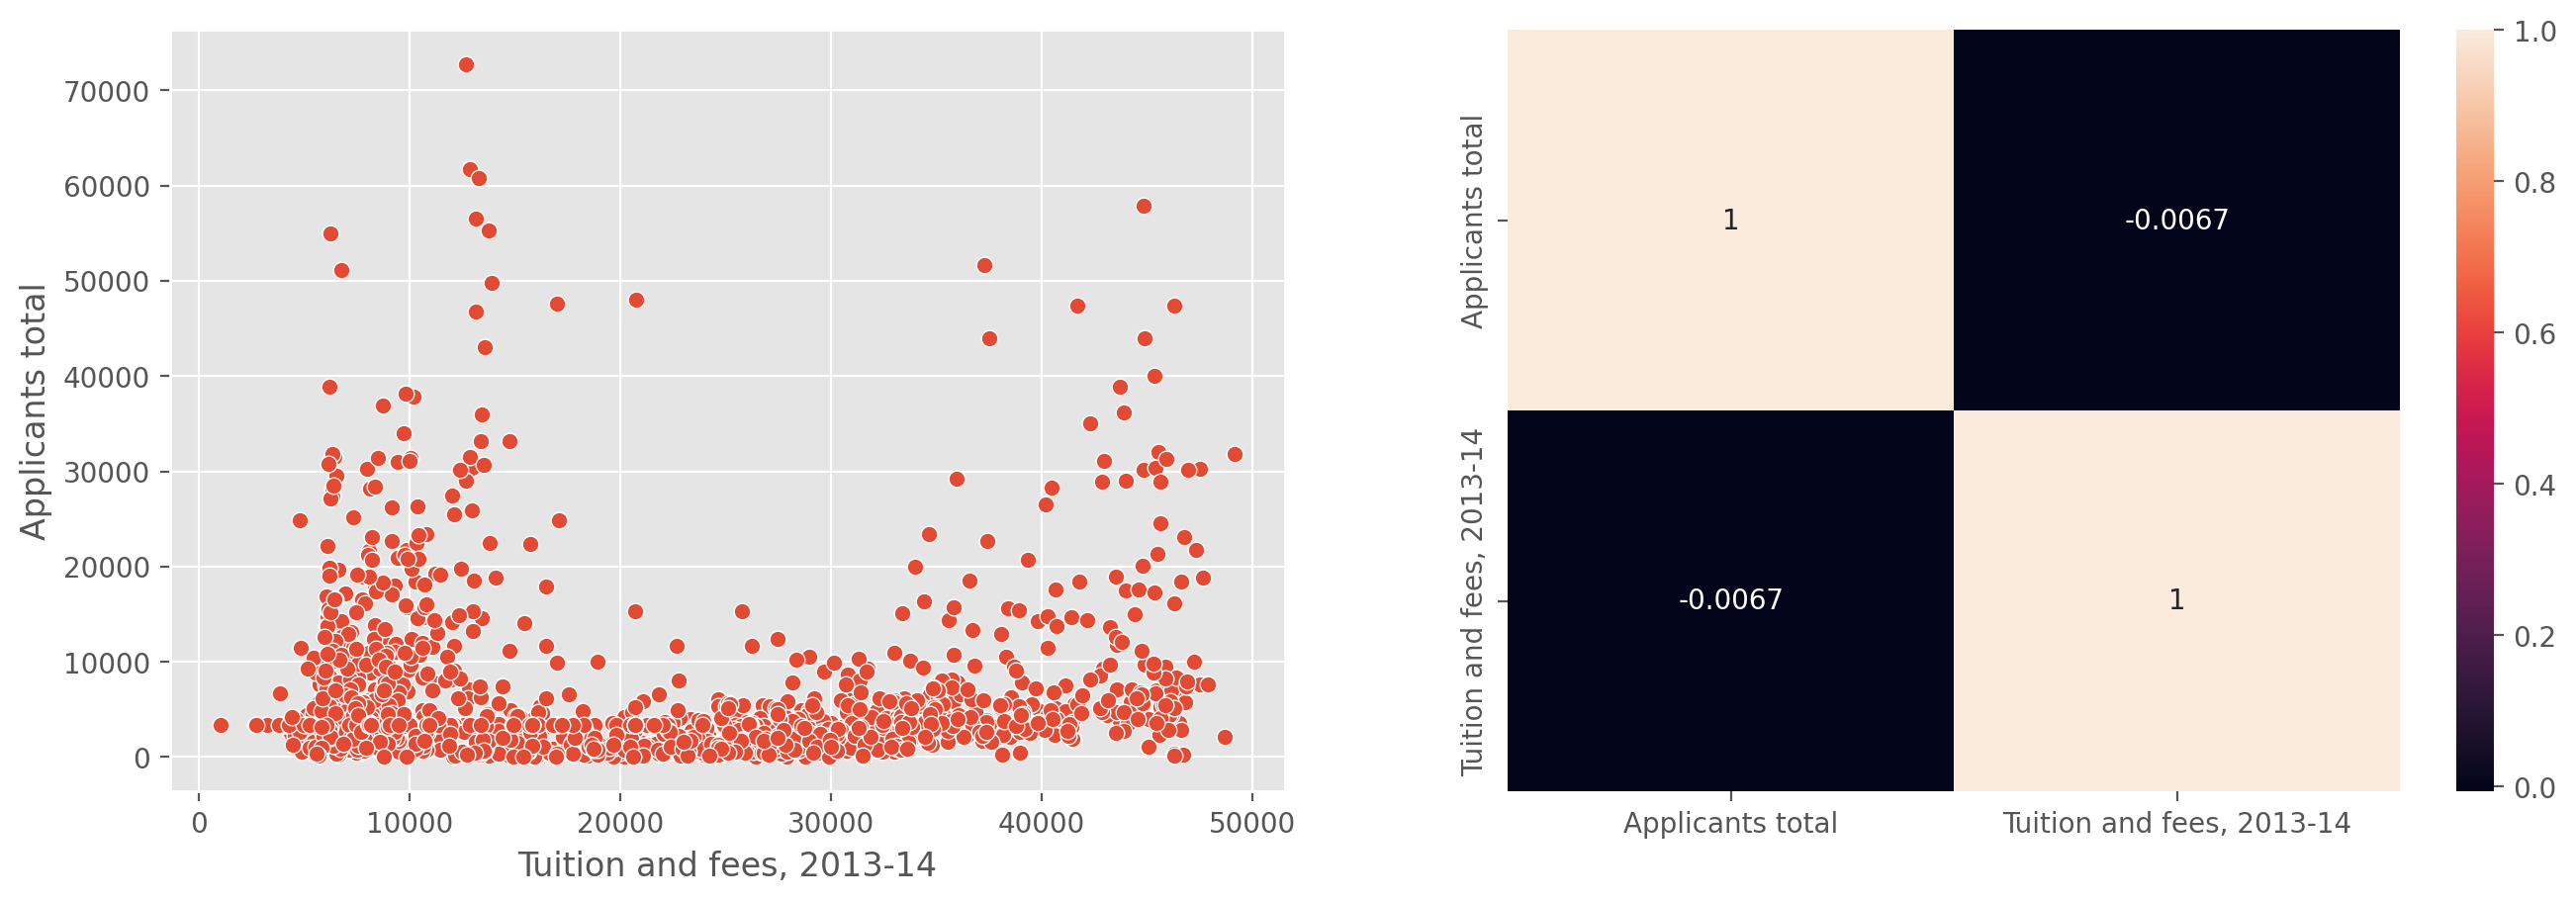

In [1372]:
cols=['Applicants total','Tuition and fees, 2013-14']
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.scatterplot(x='Tuition and fees, 2013-14', y='Applicants total', data = uni_fees)
plt.subplot(1,2,2)

sns.heatmap(uni_fees[cols].corr(), annot = True)


<Axes: >

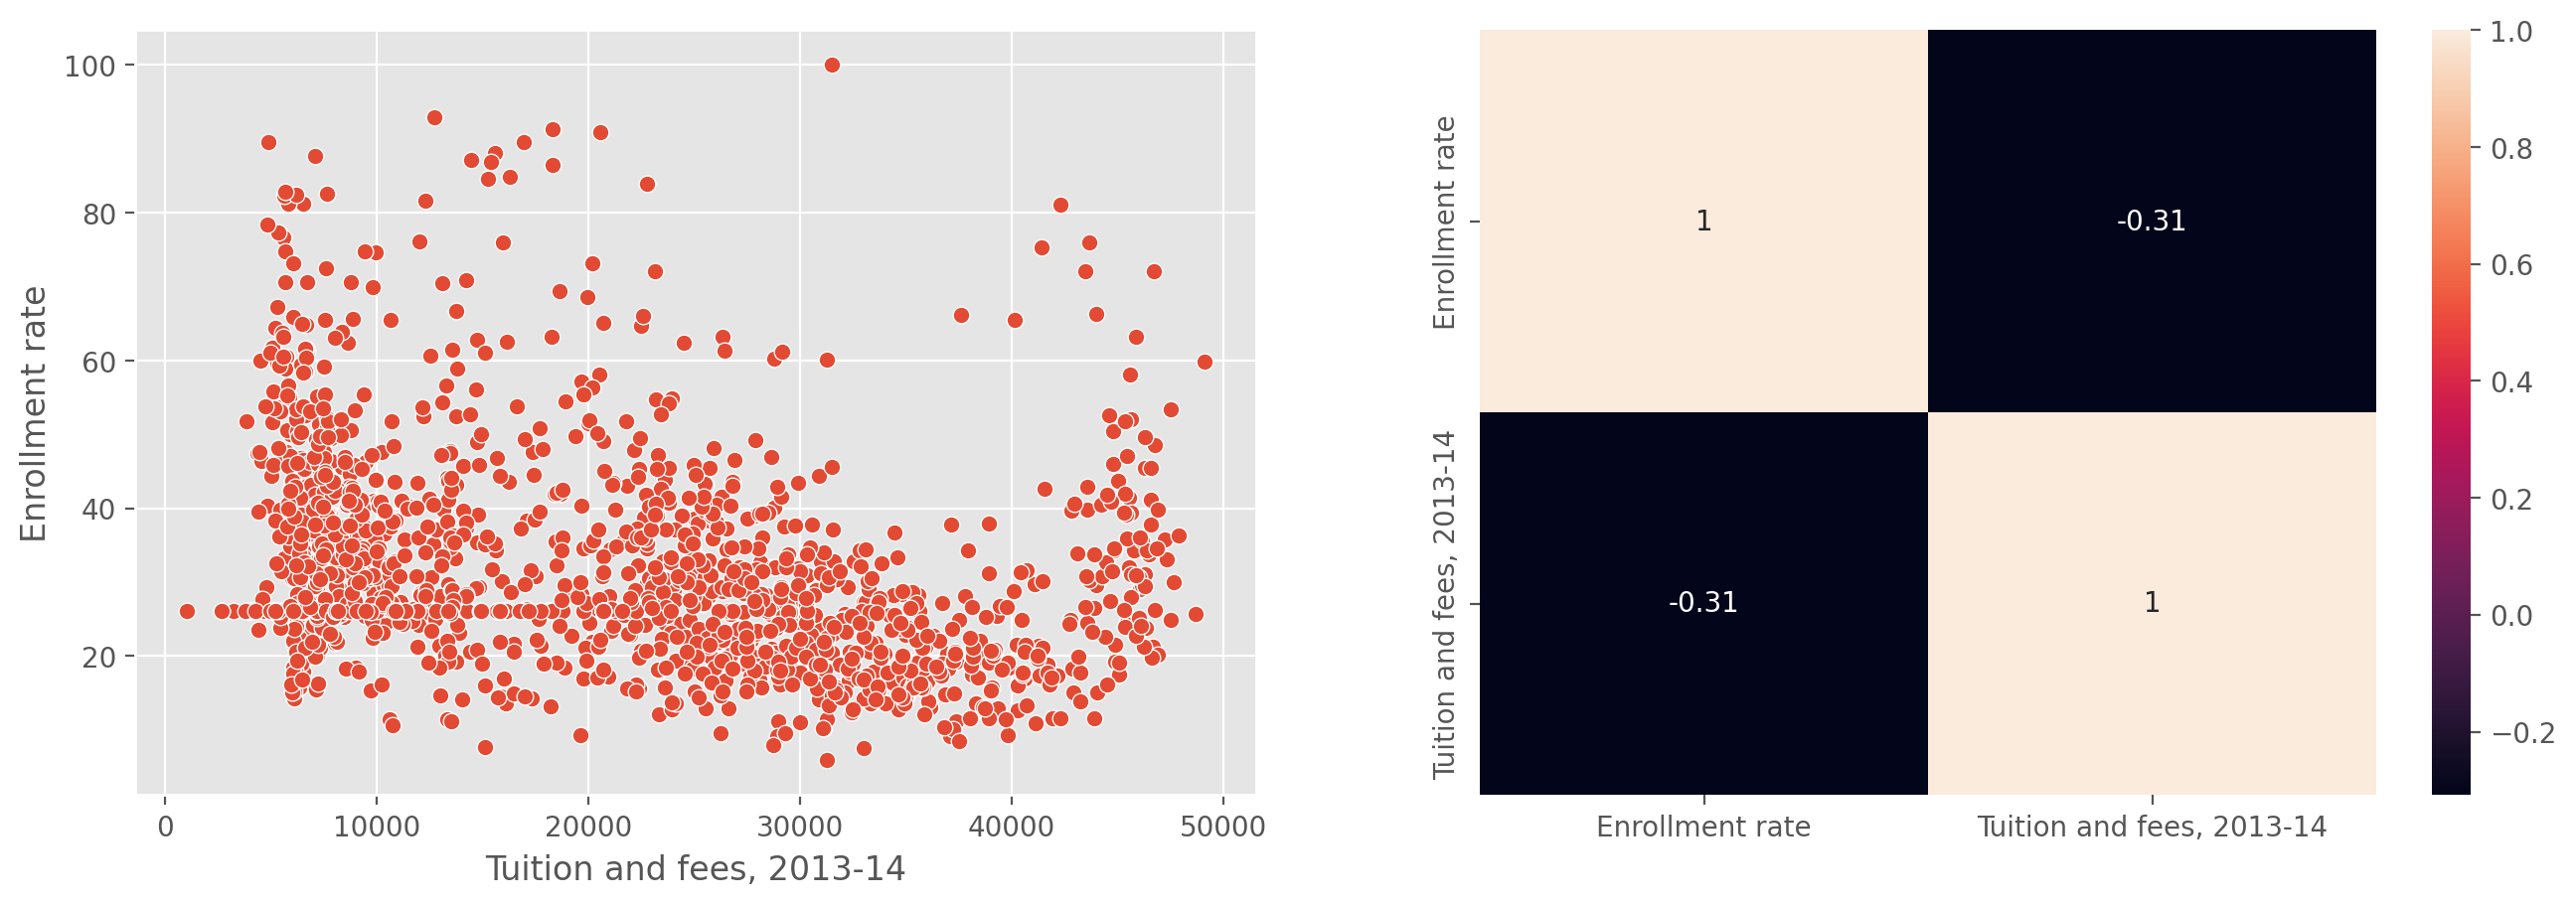

In [1373]:
cols=['Enrollment rate','Tuition and fees, 2013-14']
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.scatterplot(x='Tuition and fees, 2013-14', y='Enrollment rate', data = uni_fees)
plt.subplot(1,2,2)

sns.heatmap(uni_fees[cols].corr(), annot = True)


**Insight** : 
- Above visualization shows that enrollment rate is less for higher tuition fees. So we can conclude that students seem to prefer the universities with lesser tuition fees.

**Problem statement 5**
- Do students prefer a university for its low on-campus cost of living?



In [1374]:
university_without_null[['Total price for in-state students living on campus 2013-14','Total price for out-of-state students living on campus 2013-14']].head(20)

Total price for in-state students living on campus 2013-14  \
0                                             21849.0            
1                                             22495.0            
2                                                 NaN            
3                                             23466.0            
4                                             18286.0            
5                                             27000.0            
6                                                 NaN            
7                                             17820.0            
8                                             25282.0            
9                                             45470.0            
10                                            18330.0            
11                                            31010.0            
12                                            33885.0            
13                                            21237.0            
14                                            28840.0            
15                                            18162.0            
16                                            22318.0            
17                                            32570.0            
18                                            23340.0            
19                                            16933.0            

    Total price for out-of-state students living on campus 2013-14  
0                                             27441.0               
1                                             31687.0               
2                                                 NaN               
3                                             35780.0               
4                                             25222.0               
5                                             41500.0               
6                                                 NaN               
7                                             34020.0               
8                                             41794.0               
9                                             45470.0               
10                                            18330.0               
11                                            31010.0               
12                                            33885.0               
13                                            28029.0               
14                                            28840.0               
15                                            24672.0               
16                                            22318.0               
17                                            32570.0               
18                                            33030.0               
19                                            22525.0

<Axes: xlabel='Total price for in-state students living on campus 2013-14', ylabel='Density'>

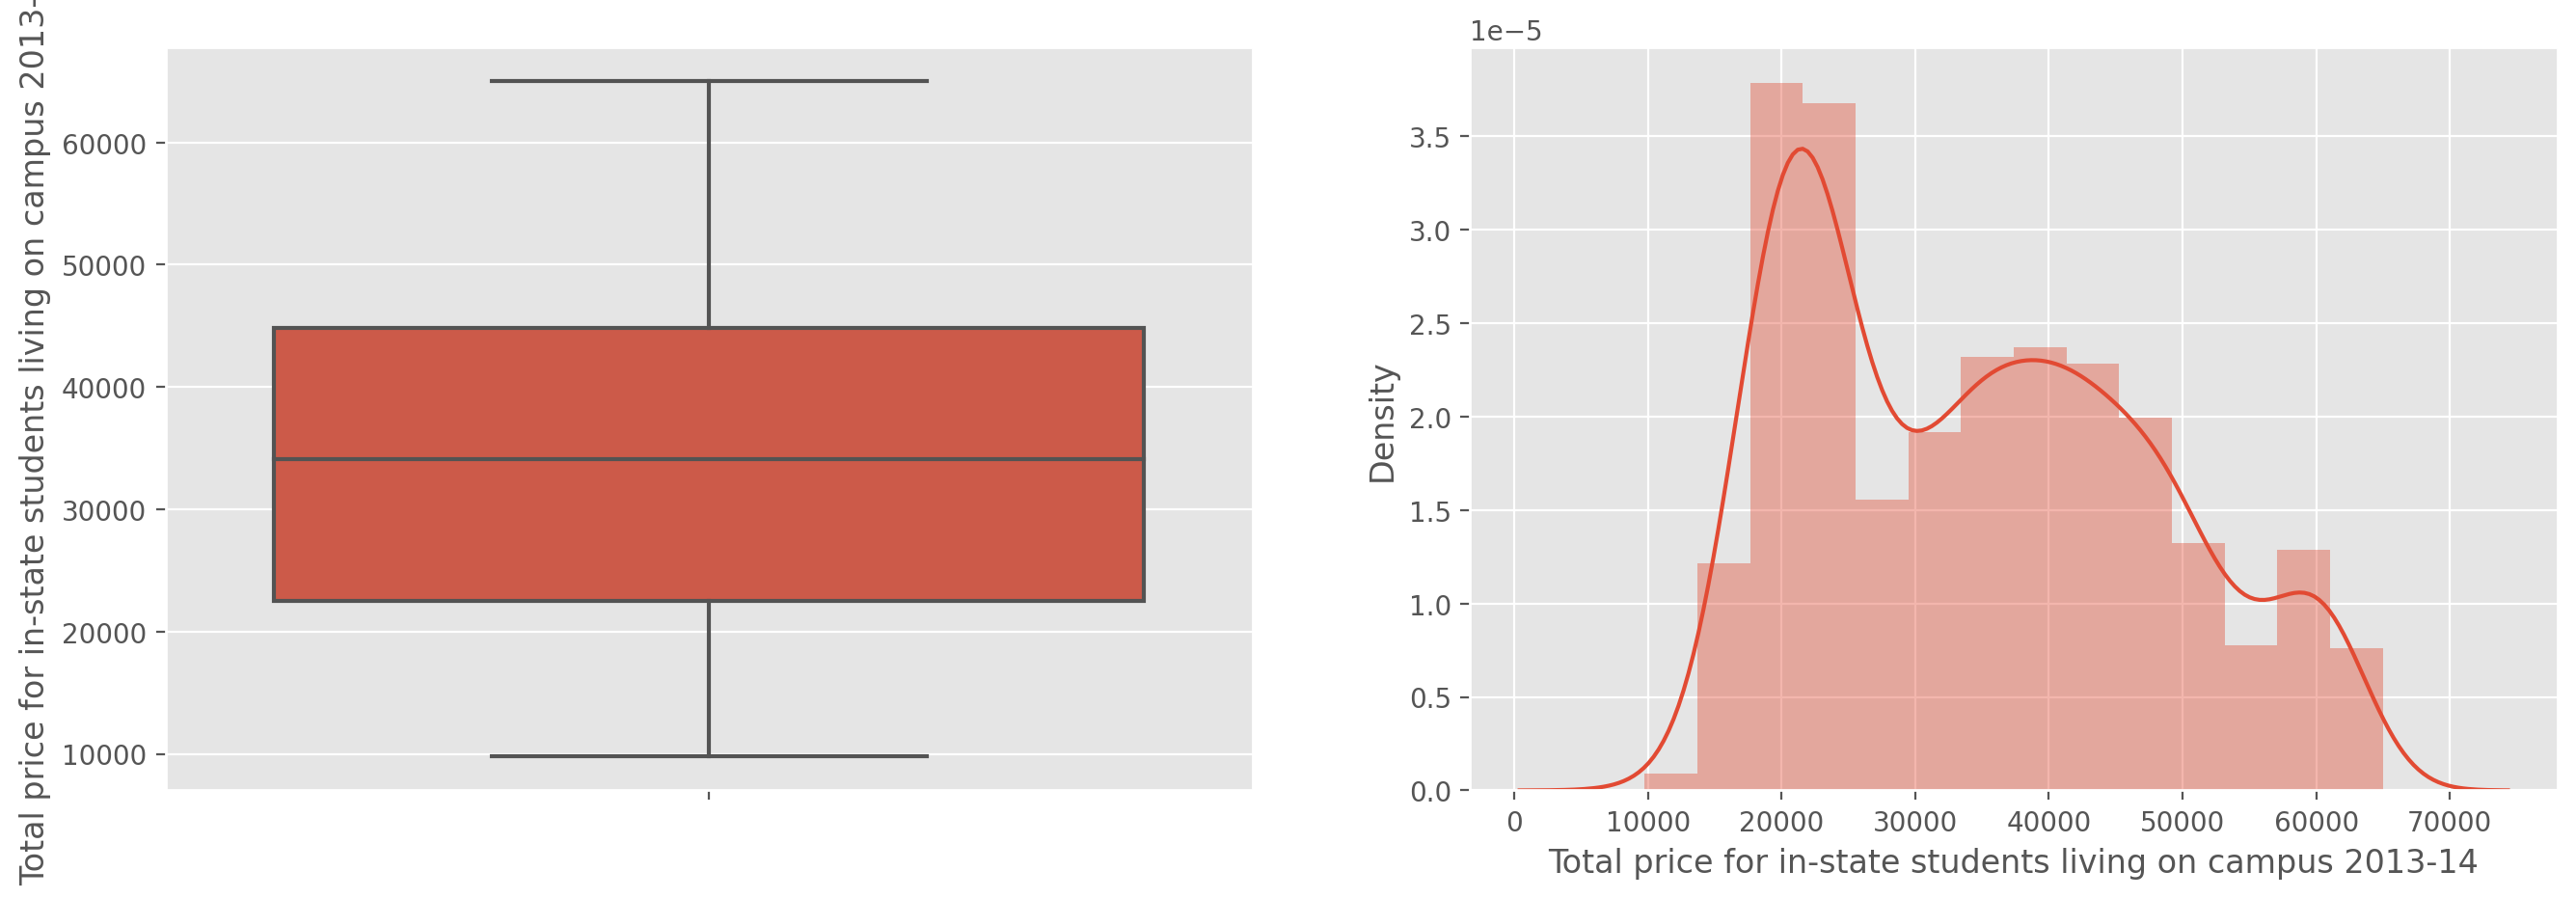

In [1375]:
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.boxplot(y=university_without_null['Total price for in-state students living on campus 2013-14'])
plt.subplot(1,2,2)
sns.distplot(university_without_null['Total price for in-state students living on campus 2013-14'])


In [1376]:
university_without_null['Total price for in-state students living on campus 2013-14'].isna().sum()

134

In [1377]:
mean=university_without_null['Total price for in-state students living on campus 2013-14'].mean()
mean

34935.30642857143

In [1378]:
university_without_null['Total price for in-state students living on campus 2013-14'].fillna(mean,inplace=True)
university_without_null['Total price for in-state students living on campus 2013-14'].head(6)

0    21849.000000
1    22495.000000
2    34935.306429
3    23466.000000
4    18286.000000
5    27000.000000
Name: Total price for in-state students living on campus 2013-14, dtype: float64

<Axes: xlabel='Total price for out-of-state students living on campus 2013-14', ylabel='Density'>

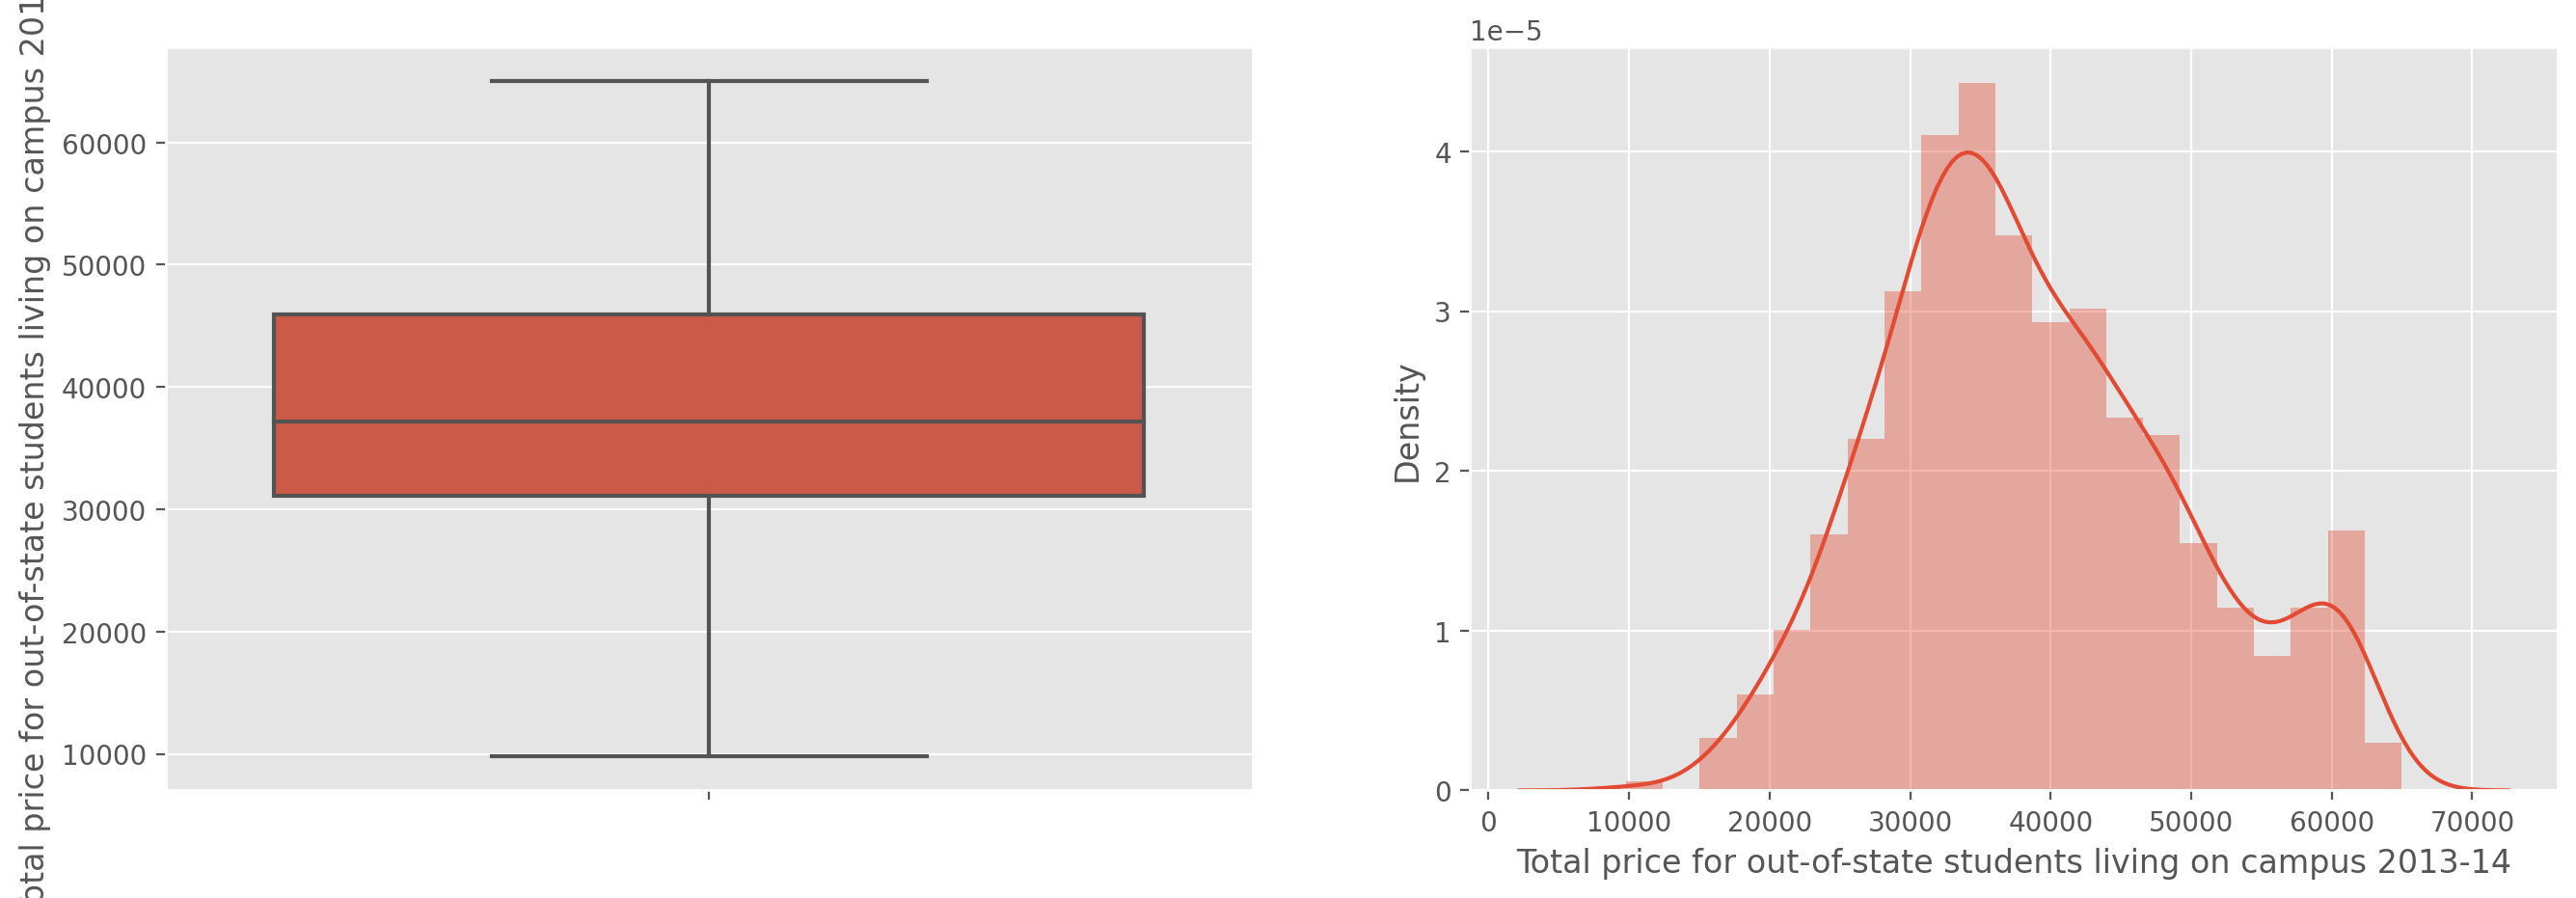

In [1379]:
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.boxplot(y=university_without_null['Total price for out-of-state students living on campus 2013-14'])
plt.subplot(1,2,2)
sns.distplot(university_without_null['Total price for out-of-state students living on campus 2013-14'])


In [1380]:
mean2=university_without_null['Total price for out-of-state students living on campus 2013-14'].mean()
mean2

38767.612857142856

In [1381]:
university_without_null['Total price for out-of-state students living on campus 2013-14'].fillna(mean2,inplace=True)
university_without_null['Total price for out-of-state students living on campus 2013-14'].head(10)

0    27441.000000
1    31687.000000
2    38767.612857
3    35780.000000
4    25222.000000
5    41500.000000
6    38767.612857
7    34020.000000
8    41794.000000
9    45470.000000
Name: Total price for out-of-state students living on campus 2013-14, dtype: float64

In [1382]:
university_without_null['Total price for out-of-state students living on campus 2013-14']=round(university_without_null['Total price for out-of-state students living on campus 2013-14'],1)
university_without_null['Total price for in-state students living on campus 2013-14']=round(university_without_null['Total price for in-state students living on campus 2013-14'],1)

In [1383]:
university_without_null[['Total price for in-state students living on campus 2013-14','Total price for out-of-state students living on campus 2013-14']].head(8)

Total price for in-state students living on campus 2013-14  \
0                                            21849.0            
1                                            22495.0            
2                                            34935.3            
3                                            23466.0            
4                                            18286.0            
5                                            27000.0            
6                                            34935.3            
7                                            17820.0            

   Total price for out-of-state students living on campus 2013-14  
0                                            27441.0               
1                                            31687.0               
2                                            38767.6               
3                                            35780.0               
4                                            25222.0               
5                                            41500.0               
6                                            38767.6               
7                                            34020.0

In [1384]:
campus_df=pd.concat([main_df,university_without_null[['Total price for in-state students living on campus 2013-14','Total price for out-of-state students living on campus 2013-14']]],axis=1)
campus_df.head(2)

Name  Applicants total  Admissions total  \
0             Alabama A & M University            6142.0            5521.0   
1  University of Alabama at Birmingham            5689.0            4934.0   

   Enrolled total  Enrollment rate  Admissions rate  \
0          1104.0            20.00            89.89   
1          1773.0            35.93            86.73   

   Total price for in-state students living on campus 2013-14  \
0                                            21849.0            
1                                            22495.0            

   Total price for out-of-state students living on campus 2013-14  
0                                            27441.0               
1                                            31687.0

<Axes: xlabel='Enrollment rate', ylabel='Total price for out-of-state students living on campus 2013-14'>

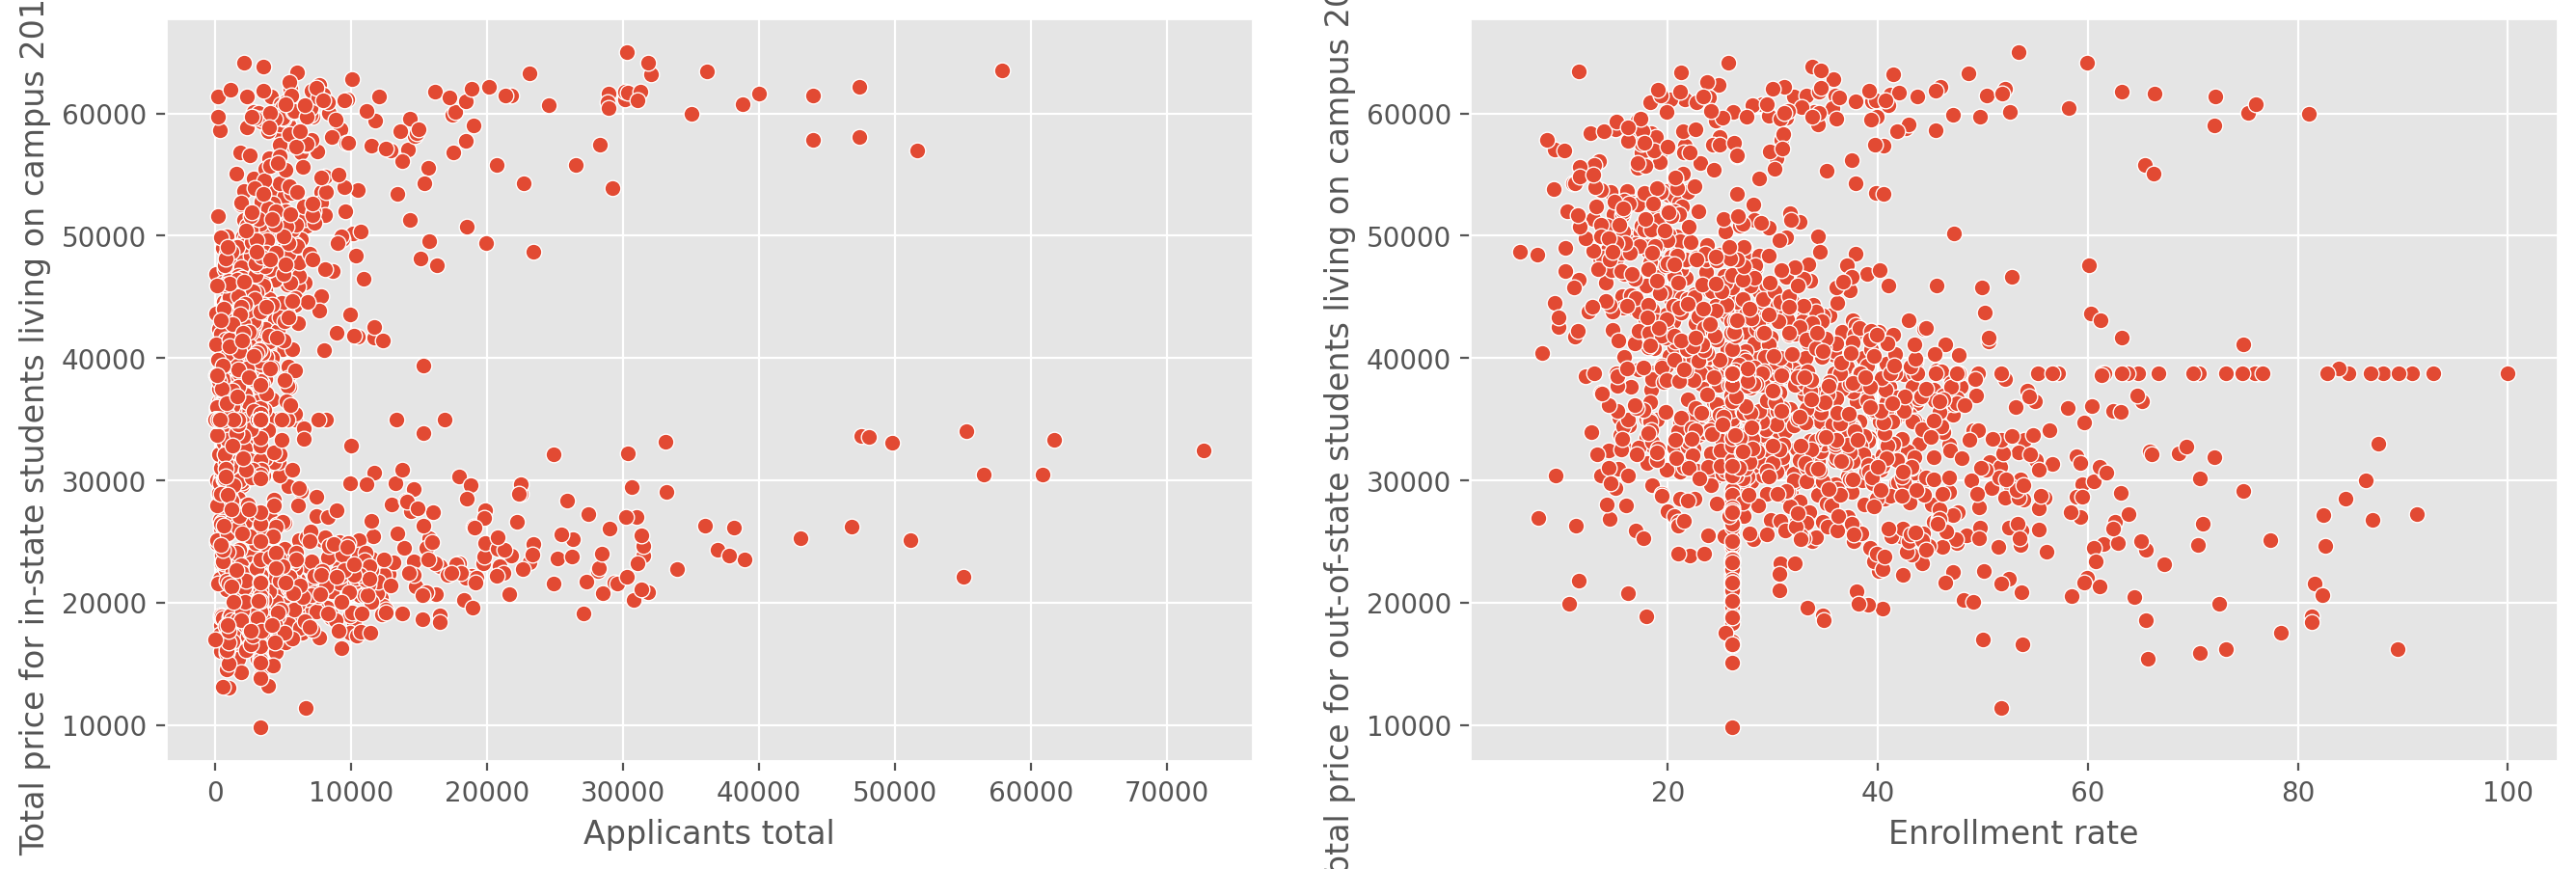

In [1385]:

plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.scatterplot(y='Total price for in-state students living on campus 2013-14', x='Applicants total', data = campus_df)

plt.subplot(1,2,2)
sns.scatterplot(y='Total price for out-of-state students living on campus 2013-14', x='Enrollment rate', data = campus_df)

<Axes: xlabel='Applicants total', ylabel='Total price for out-of-state students living on campus 2013-14'>

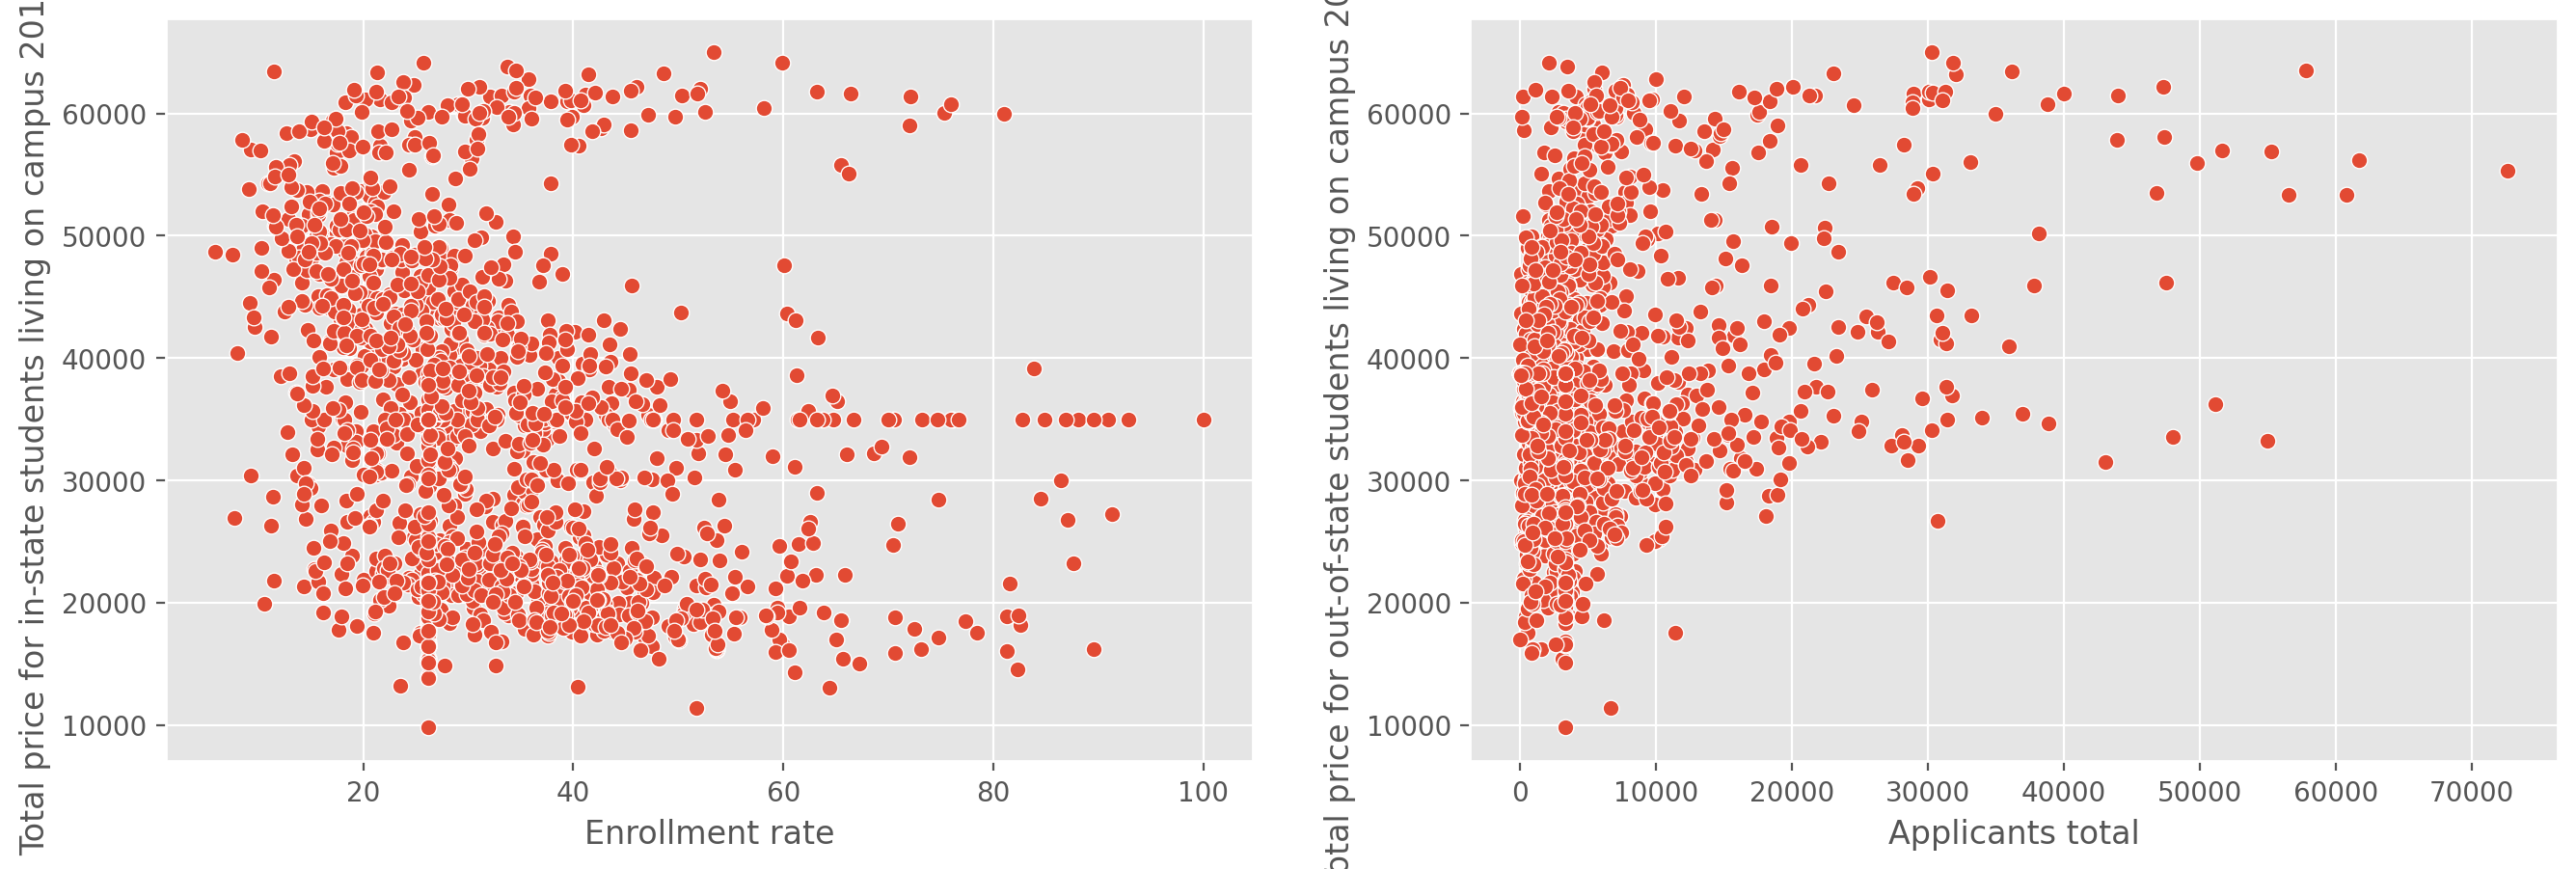

In [1386]:
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.scatterplot(y='Total price for in-state students living on campus 2013-14', x='Enrollment rate', data = campus_df)

plt.subplot(1,2,2)
sns.scatterplot(y='Total price for out-of-state students living on campus 2013-14', x='Applicants total', data = campus_df)

**Insight**
- Above visualization shows us that students prefer a university for its low on-campus cost of living

**Problem statement 7**
- Do students prefer a university because it belongs to a state with a high GDP per capita?!

- Required columns:
State abbreviation, Applicants total and enrolled total


In [1387]:
gdp_uni=university_without_null.groupby('State abbreviation')['Applicants total','Enrolled total'].max().sort_values(by='Enrolled total',ascending=False)
gdp_uni.head(5)

Applicants total  Enrolled total
State abbreviation                                  
Texas                        38161.0         10241.0
Michigan                     46813.0          8061.0
Pennsylvania                 47552.0          7649.0
Indiana                      37826.0          7604.0
Arizona                      33989.0          7401.0

In [1388]:
type(gdp_uni)

pandas.core.frame.DataFrame

In [1389]:
#Sorting according to state names as we have to combine another dataframe.
gdp_uni=university_without_null.groupby('State abbreviation')['Applicants total','Enrolled total'].max().sort_values(by='State abbreviation')
gdp_uni.head(20)

Applicants total  Enrolled total
State abbreviation                                    
Alabama                        30975.0          6454.0
Alaska                           494.0            33.0
Arizona                        33989.0          7401.0
Arkansas                       18908.0          4339.0
California                     72676.0          5620.0
Colorado                       22473.0          5846.0
Connecticut                    28977.0          3755.0
Delaware                       25458.0          4224.0
District of Columbia           21756.0          2387.0
Florida                        31820.0          6373.0
Georgia                        18458.0          4936.0
Hawaii                          6901.0          1981.0
Idaho                           7832.0          3448.0
Illinois                       33203.0          7329.0
Indiana                        37826.0          7604.0
Iowa                           21642.0          5366.0
Kansas                         12389.0          3821.0
Kentucky                       19810.0          4702.0
Louisiana                      30122.0          5725.0
Maine                           8306.0          1997.0

In [1390]:
#we need to have same indexing for both the data frames. so in the above df, we have to reset index
gdp_uni.reset_index(inplace=True)


In [1391]:
gdp_uni.head()

State abbreviation  Applicants total  Enrolled total
0            Alabama           30975.0          6454.0
1             Alaska             494.0            33.0
2            Arizona           33989.0          7401.0
3           Arkansas           18908.0          4339.0
4         California           72676.0          5620.0

In [1392]:
gdp_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State abbreviation  51 non-null     object 
 1   Applicants total    51 non-null     float64
 2   Enrolled total      51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [1393]:
state_gdp=pd.read_csv('states_gdp.csv')
state_gdp.head()

code       state  gdp_million
0  1000     Alabama     191481.0
1  2000      Alaska      56622.8
2  4000     Arizona     275199.1
3  5000    Arkansas     114251.5
4  6000  California    2262771.2

In [1394]:
state_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         51 non-null     int64  
 1   state        51 non-null     object 
 2   gdp_million  51 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [1395]:
#We have to concat these two dataframes.
col=state_gdp['gdp_million']
display(col)


0      191481.0
1       56622.8
2      275199.1
3      114251.5
4     2262771.2
5      288305.2
6      246632.0
7       60666.1
8      114891.0
9      800704.1
10     460585.1
11      75788.3
12      61017.7
13     739627.9
14     308681.7
15     160299.8
16     143220.7
17     182359.2
18     228967.4
19      53719.0
20     341255.3
21     454345.7
22     432717.6
23     306153.0
24     101638.1
25     277851.1
26      43141.0
27     107604.3
28     130621.4
29      70181.9
30     533686.7
31      88411.2
32    1355581.4
33     455521.6
34      53881.7
35     561045.5
36     182618.4
37     179382.7
38     663900.8
39      53209.9
40     183014.9
41      44814.9
42     292803.9
43    1502249.8
44     134252.1
45      29098.8
46     455070.0
47     419345.0
48      71037.6
49     282384.6
50      38922.5
Name: gdp_million, dtype: float64

In [1396]:
gdp_uni=gdp_uni.join(col)
gdp_uni

State abbreviation  Applicants total  Enrolled total  gdp_million
0                Alabama           30975.0          6454.0     191481.0
1                 Alaska             494.0            33.0      56622.8
2                Arizona           33989.0          7401.0     275199.1
3               Arkansas           18908.0          4339.0     114251.5
4             California           72676.0          5620.0    2262771.2
5               Colorado           22473.0          5846.0     288305.2
6            Connecticut           28977.0          3755.0     246632.0
7               Delaware           25458.0          4224.0      60666.1
8   District of Columbia           21756.0          2387.0     114891.0
9                Florida           31820.0          6373.0     800704.1
10               Georgia           18458.0          4936.0     460585.1
11                Hawaii            6901.0          1981.0      75788.3
12                 Idaho            7832.0          3448.0      61017.7
13              Illinois           33203.0          7329.0     739627.9
14               Indiana           37826.0          7604.0     308681.7
15                  Iowa           21642.0          5366.0     160299.8
16                Kansas           12389.0          3821.0     143220.7
17              Kentucky           19810.0          4702.0     182359.2
18             Louisiana           30122.0          5725.0     228967.4
19                 Maine            8306.0          1997.0      53719.0
20              Maryland           26247.0          4020.0     341255.3
21         Massachusetts           47364.0          4672.0     454345.7
22              Michigan           46813.0          8061.0     432717.6
23             Minnesota           43048.0          5544.0     306153.0
24           Mississippi           14258.0          3582.0     101638.1
25              Missouri           30117.0          6194.0     277851.1
26               Montana           12581.0          2914.0      43141.0
27              Nebraska           10929.0          4420.0     107604.3
28                Nevada            7857.0          3773.0     130621.4
29         New Hampshire           23110.0          2869.0      70181.9
30            New Jersey           30631.0          6337.0     533686.7
31            New Mexico           11467.0          3424.0      88411.2
32              New York           57845.0          5207.0    1355581.4
33        North Carolina           30374.0          4398.0     455521.6
34          North Dakota            5812.0          2553.0      53881.7
35                  Ohio           31359.0          7130.0     561045.5
36              Oklahoma           11064.0          4052.0     182618.4
37                Oregon           21263.0          4031.0     179382.7
38          Pennsylvania           47552.0          7649.0     663900.8
39          Rhode Island           28919.0          2993.0      53209.9
40        South Carolina           23429.0          4625.0     183014.9
41          South Dakota            4851.0          2306.0      44814.9
42             Tennessee           31099.0          4276.0     292803.9
43                 Texas           38161.0         10241.0    1502249.8
44                  Utah           11423.0          4427.0     134252.1
45               Vermont           22381.0          2495.0      29098.8
46              Virginia           48054.0          5364.0     455070.0
47            Washington           30199.0          6253.0     419345.0
48         West Virginia           16521.0          5135.0      71037.6
49             Wisconsin           23432.0          6279.0     282384.6
50               Wyoming            4181.0          1584.0      38922.5

<Axes: >

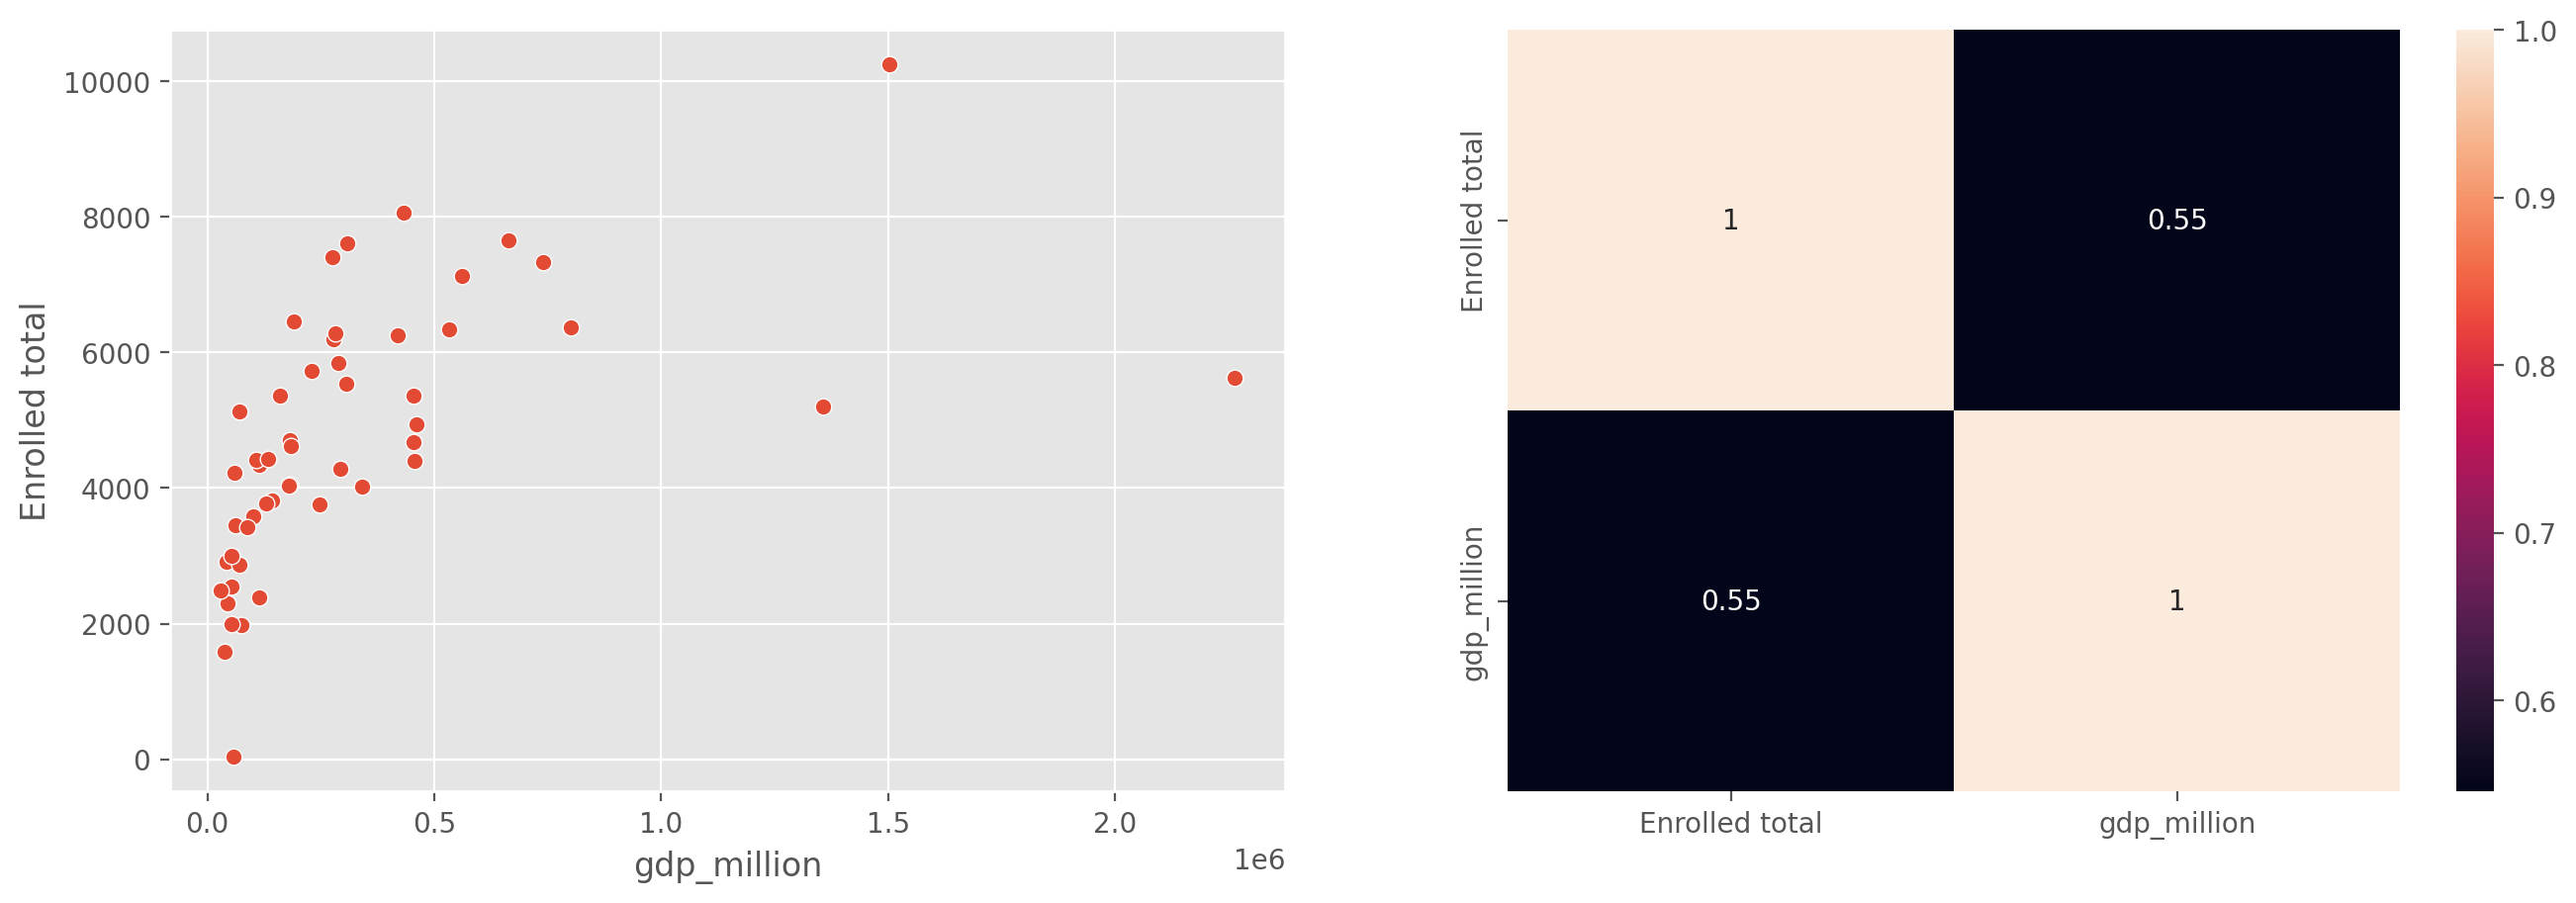

In [1397]:
cols=['Enrolled total','gdp_million']
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.scatterplot(x='gdp_million', y='Enrolled total', data = gdp_uni)
plt.subplot(1,2,2)
sns.heatmap(gdp_uni[cols].corr(), annot = True)


<Axes: >

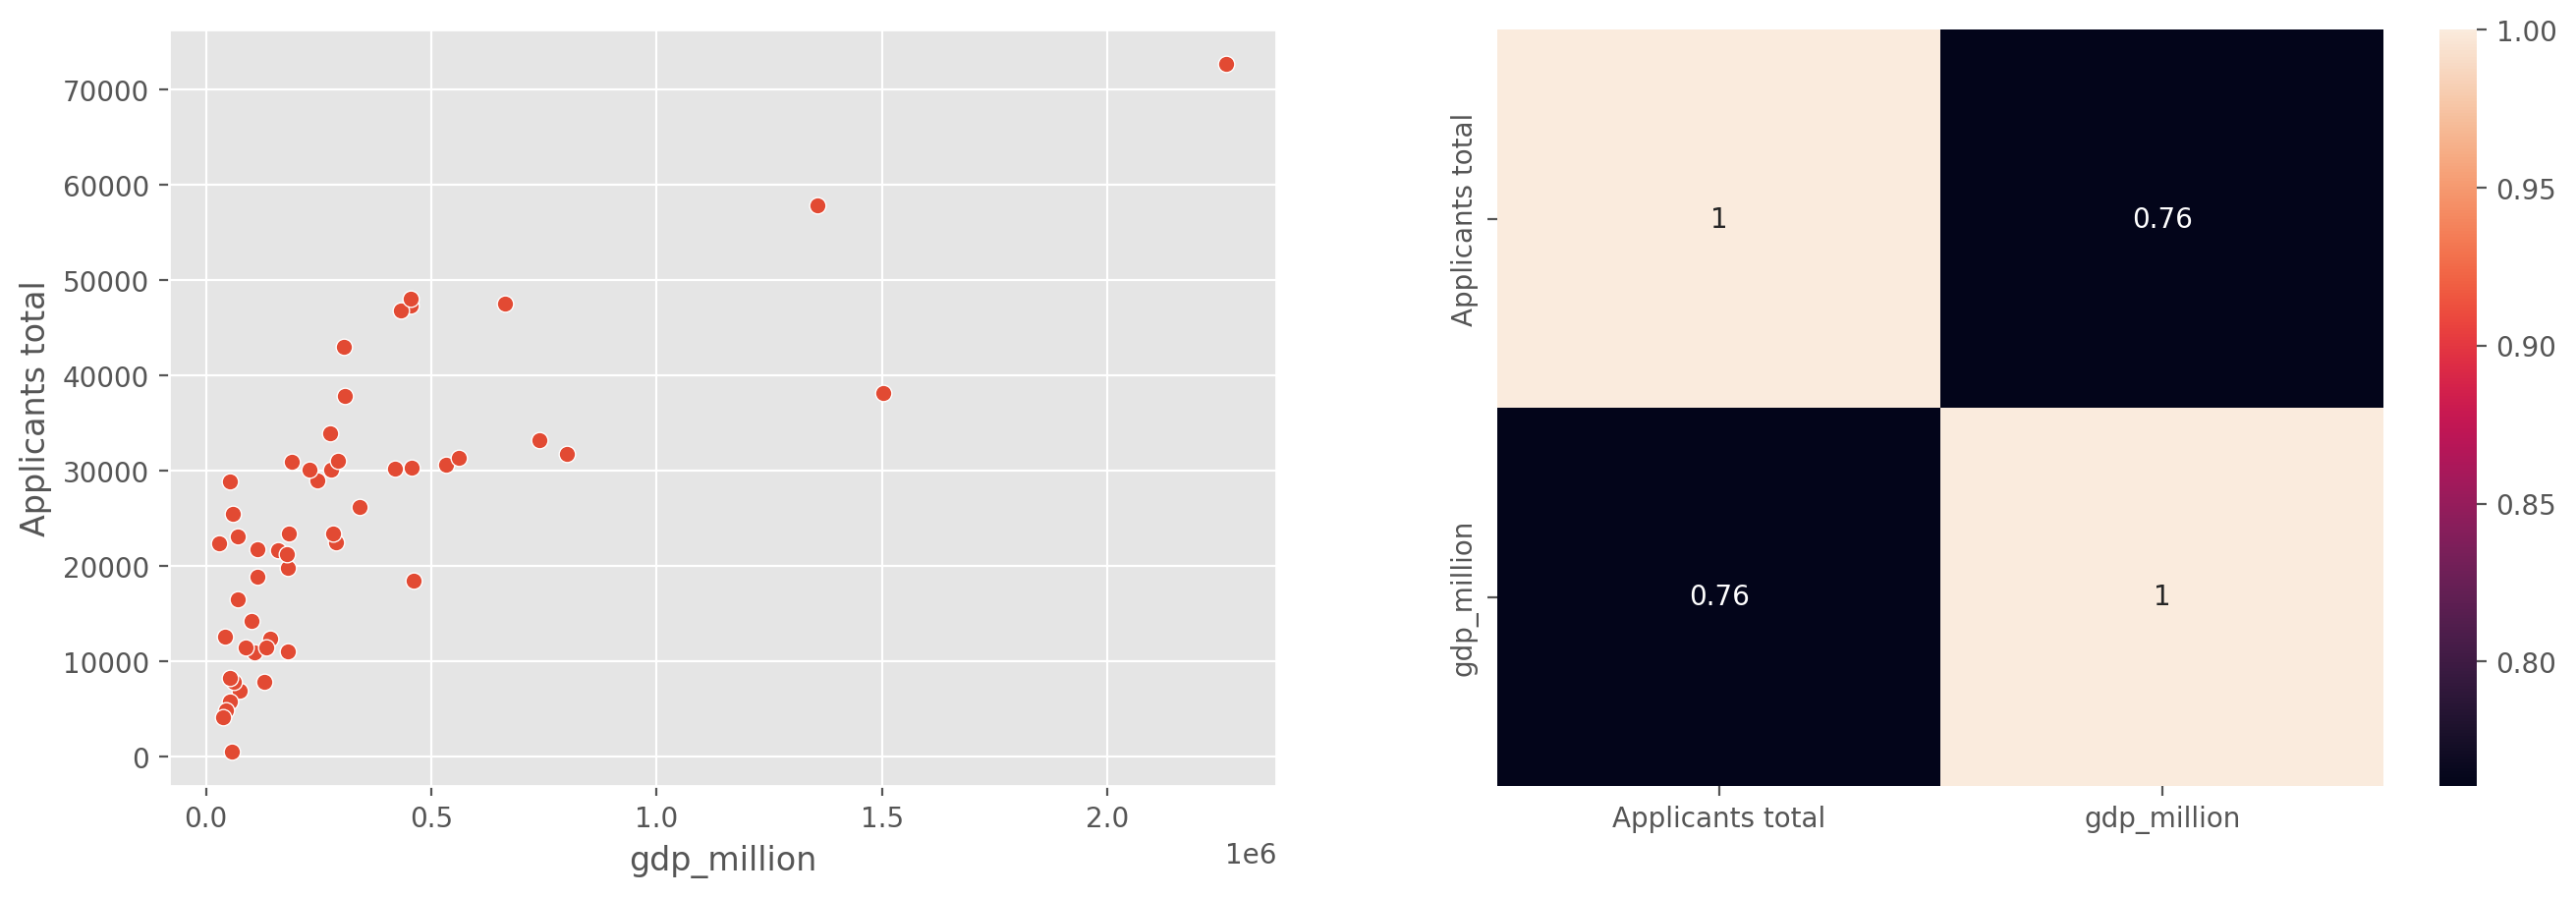

In [1398]:
cols=['Applicants total','gdp_million']
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.scatterplot(x='gdp_million', y='Applicants total', data = gdp_uni)
plt.subplot(1,2,2)
sns.heatmap(gdp_uni[cols].corr(), annot = True)


**Insight**
- By seeing the above visualizations, we can conclude that students does not prefer a university because it belongs to a state with a high GDP per capita

**Problem statement 8**
- Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?

- Required columns:
Highest degree offered, Applicants total and enrolled total

In [1399]:
university_without_null[['Name','Highest degree offered']].isnull().sum()

Name                      0
Highest degree offered    0
dtype: int64

In [1400]:
main_df.head(20)

Name  Applicants total  Admissions total  \
0              Alabama A & M University            6142.0            5521.0   
1   University of Alabama at Birmingham            5689.0            4934.0   
2                    Amridge University            3350.0            2056.0   
3   University of Alabama in Huntsville            2054.0            1656.0   
4              Alabama State University           10245.0            5251.0   
5             The University of Alabama           30975.0           17515.0   
6               Athens State University            3350.0            2056.0   
7       Auburn University at Montgomery            1958.0            1639.0   
8                     Auburn University           15745.0           13027.0   
9           Birmingham Southern College            1931.0            1240.0   
10            Concordia College Alabama            3350.0            2056.0   
11                  Faulkner University            3350.0            2056.0   
12                   Huntingdon College            1470.0             923.0   
13        Jacksonville State University            3083.0            2567.0   
14                       Judson College             268.0             198.0   
15           University of West Alabama             462.0             460.0   
16                        Miles College            3350.0            2056.0   
17                 University of Mobile             866.0             617.0   
18             University of Montevallo            1385.0            1209.0   
19          University of North Alabama            2542.0            2057.0   

    Enrolled total  Enrollment rate  Admissions rate  
0           1104.0            20.00            89.89  
1           1773.0            35.93            86.73  
2            538.0            26.17            61.37  
3            651.0            39.31            80.62  
4           1479.0            28.17            51.25  
5           6454.0            36.85            56.55  
6            538.0            26.17            61.37  
7            579.0            35.33            83.71  
8           3726.0            28.60            82.74  
9            356.0            28.71            64.22  
10           538.0            26.17            61.37  
11           538.0            26.17            61.37  
12           261.0            28.28            62.79  
13          1158.0            45.11            83.26  
14            68.0            34.34            73.88  
15           380.0            82.61            99.57  
16           538.0            26.17            61.37  
17           259.0            41.98            71.25  
18           531.0            43.92            87.29  
19           970.0            47.16            80.92

In [1401]:
main_df=main_df.join(university_without_null['Highest degree offered'])
main_df.head(20)

Name  Applicants total  Admissions total  \
0              Alabama A & M University            6142.0            5521.0   
1   University of Alabama at Birmingham            5689.0            4934.0   
2                    Amridge University            3350.0            2056.0   
3   University of Alabama in Huntsville            2054.0            1656.0   
4              Alabama State University           10245.0            5251.0   
5             The University of Alabama           30975.0           17515.0   
6               Athens State University            3350.0            2056.0   
7       Auburn University at Montgomery            1958.0            1639.0   
8                     Auburn University           15745.0           13027.0   
9           Birmingham Southern College            1931.0            1240.0   
10            Concordia College Alabama            3350.0            2056.0   
11                  Faulkner University            3350.0            2056.0   
12                   Huntingdon College            1470.0             923.0   
13        Jacksonville State University            3083.0            2567.0   
14                       Judson College             268.0             198.0   
15           University of West Alabama             462.0             460.0   
16                        Miles College            3350.0            2056.0   
17                 University of Mobile             866.0             617.0   
18             University of Montevallo            1385.0            1209.0   
19          University of North Alabama            2542.0            2057.0   

    Enrolled total  Enrollment rate  Admissions rate  \
0           1104.0            20.00            89.89   
1           1773.0            35.93            86.73   
2            538.0            26.17            61.37   
3            651.0            39.31            80.62   
4           1479.0            28.17            51.25   
5           6454.0            36.85            56.55   
6            538.0            26.17            61.37   
7            579.0            35.33            83.71   
8           3726.0            28.60            82.74   
9            356.0            28.71            64.22   
10           538.0            26.17            61.37   
11           538.0            26.17            61.37   
12           261.0            28.28            62.79   
13          1158.0            45.11            83.26   
14            68.0            34.34            73.88   
15           380.0            82.61            99.57   
16           538.0            26.17            61.37   
17           259.0            41.98            71.25   
18           531.0            43.92            87.29   
19           970.0            47.16            80.92   

                               Highest degree offered  
0              Doctor's degree - research/scholarship  
1   Doctor's degree - research/scholarship and pro...  
2   Doctor's degree - research/scholarship and pro...  
3   Doctor's degree - research/scholarship and pro...  
4   Doctor's degree - research/scholarship and pro...  
5   Doctor's degree - research/scholarship and pro...  
6                                   Bachelor's degree  
7              Doctor's degree - research/scholarship  
8   Doctor's degree - research/scholarship and pro...  
9                                   Bachelor's degree  
10                                  Bachelor's degree  
11            Doctor's degree - professional practice  
12                                  Bachelor's degree  
13             Doctor's degree - research/scholarship  
14                                  Bachelor's degree  
15                                    Master's degree  
16                                  Bachelor's degree  
17                                    Master's degree  
18                                    Master's degree  
19                                    Master's degree

In [1402]:
main_df['Highest degree offered'].unique()
#here we see that all are higher degrees excxept "Bachelor's degree"

array(["Doctor's degree - research/scholarship",
       "Doctor's degree - research/scholarship and professional practice",
       "Bachelor's degree", "Doctor's degree - professional practice",
       "Master's degree", "Doctor's degree - other"], dtype=object)

In [1403]:
high_degree=["Doctor's degree - professional practice","Doctor's degree - research/scholarship","Doctor's degree - research/scholarship and professional practice","Master's degree","Doctor's degree - other"]
high_degree

["Doctor's degree - professional practice",
 "Doctor's degree - research/scholarship",
 "Doctor's degree - research/scholarship and professional practice",
 "Master's degree",
 "Doctor's degree - other"]

In [1404]:
for row in main_df['Highest degree offered']:
    print(row)

Doctor's degree - research/scholarship
Doctor's degree - research/scholarship and professional practice
Doctor's degree - research/scholarship and professional practice
Doctor's degree - research/scholarship and professional practice
Doctor's degree - research/scholarship and professional practice
Doctor's degree - research/scholarship and professional practice
Bachelor's degree
Doctor's degree - research/scholarship
Doctor's degree - research/scholarship and professional practice
Bachelor's degree
Bachelor's degree
Doctor's degree - professional practice
Bachelor's degree
Doctor's degree - research/scholarship
Bachelor's degree
Master's degree
Bachelor's degree
Master's degree
Master's degree
Master's degree
Master's degree
Doctor's degree - research/scholarship and professional practice
Doctor's degree - research/scholarship and professional practice
Master's degree
Bachelor's degree
Bachelor's degree
Doctor's degree - professional practice
Doctor's degree - research/scholarship and 

In [1405]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    1534 non-null   object 
 1   Applicants total        1534 non-null   float64
 2   Admissions total        1534 non-null   float64
 3   Enrolled total          1534 non-null   float64
 4   Enrollment rate         1534 non-null   float64
 5   Admissions rate         1534 non-null   float64
 6   Highest degree offered  1534 non-null   object 
dtypes: float64(5), object(2)
memory usage: 84.0+ KB


In [1406]:
main_df.head()

Name  Applicants total  Admissions total  \
0             Alabama A & M University            6142.0            5521.0   
1  University of Alabama at Birmingham            5689.0            4934.0   
2                   Amridge University            3350.0            2056.0   
3  University of Alabama in Huntsville            2054.0            1656.0   
4             Alabama State University           10245.0            5251.0   

   Enrolled total  Enrollment rate  Admissions rate  \
0          1104.0            20.00            89.89   
1          1773.0            35.93            86.73   
2           538.0            26.17            61.37   
3           651.0            39.31            80.62   
4          1479.0            28.17            51.25   

                              Highest degree offered  
0             Doctor's degree - research/scholarship  
1  Doctor's degree - research/scholarship and pro...  
2  Doctor's degree - research/scholarship and pro...  
3  Doctor's degree - research/scholarship and pro...  
4  Doctor's degree - research/scholarship and pro...

In [1407]:
main_df['Provides high degree'] = np.where(main_df['Highest degree offered']!= "Bachelor's degree", 'Yes', "No")
main_df.head(20)

Name  Applicants total  Admissions total  \
0              Alabama A & M University            6142.0            5521.0   
1   University of Alabama at Birmingham            5689.0            4934.0   
2                    Amridge University            3350.0            2056.0   
3   University of Alabama in Huntsville            2054.0            1656.0   
4              Alabama State University           10245.0            5251.0   
5             The University of Alabama           30975.0           17515.0   
6               Athens State University            3350.0            2056.0   
7       Auburn University at Montgomery            1958.0            1639.0   
8                     Auburn University           15745.0           13027.0   
9           Birmingham Southern College            1931.0            1240.0   
10            Concordia College Alabama            3350.0            2056.0   
11                  Faulkner University            3350.0            2056.0   
12                   Huntingdon College            1470.0             923.0   
13        Jacksonville State University            3083.0            2567.0   
14                       Judson College             268.0             198.0   
15           University of West Alabama             462.0             460.0   
16                        Miles College            3350.0            2056.0   
17                 University of Mobile             866.0             617.0   
18             University of Montevallo            1385.0            1209.0   
19          University of North Alabama            2542.0            2057.0   

    Enrolled total  Enrollment rate  Admissions rate  \
0           1104.0            20.00            89.89   
1           1773.0            35.93            86.73   
2            538.0            26.17            61.37   
3            651.0            39.31            80.62   
4           1479.0            28.17            51.25   
5           6454.0            36.85            56.55   
6            538.0            26.17            61.37   
7            579.0            35.33            83.71   
8           3726.0            28.60            82.74   
9            356.0            28.71            64.22   
10           538.0            26.17            61.37   
11           538.0            26.17            61.37   
12           261.0            28.28            62.79   
13          1158.0            45.11            83.26   
14            68.0            34.34            73.88   
15           380.0            82.61            99.57   
16           538.0            26.17            61.37   
17           259.0            41.98            71.25   
18           531.0            43.92            87.29   
19           970.0            47.16            80.92   

                               Highest degree offered Provides high degree  
0              Doctor's degree - research/scholarship                  Yes  
1   Doctor's degree - research/scholarship and pro...                  Yes  
2   Doctor's degree - research/scholarship and pro...                  Yes  
3   Doctor's degree - research/scholarship and pro...                  Yes  
4   Doctor's degree - research/scholarship and pro...                  Yes  
5   Doctor's degree - research/scholarship and pro...                  Yes  
6                                   Bachelor's degree                   No  
7              Doctor's degree - research/scholarship                  Yes  
8   Doctor's degree - research/scholarship and pro...                  Yes  
9                                   Bachelor's degree                   No  
10                                  Bachelor's degree                   No  
11            Doctor's degree - professional practice                  Yes  
12                                  Bachelor's degree                   No  
13             Doctor's degree - research/scholarship                  Yes  
14                                  Bachelo

In [1408]:
#Alternatively we can use map function for the samething as above
Provides_high_degree=main_df['Highest degree offered'].map({"Doctor's degree - research/scholarship":'Yes',"Master's degree":'Yes',"Doctor's degree - research/scholarship and professional practice":'Yes',"Bachelor's degree":"No","Doctor's degree - professional practice":"Yes","Doctor's degree - other":"Yes"})
main_df['Provides high degree']=Provides_high_degree

In [1409]:
main_df.head(20)

Name  Applicants total  Admissions total  \
0              Alabama A & M University            6142.0            5521.0   
1   University of Alabama at Birmingham            5689.0            4934.0   
2                    Amridge University            3350.0            2056.0   
3   University of Alabama in Huntsville            2054.0            1656.0   
4              Alabama State University           10245.0            5251.0   
5             The University of Alabama           30975.0           17515.0   
6               Athens State University            3350.0            2056.0   
7       Auburn University at Montgomery            1958.0            1639.0   
8                     Auburn University           15745.0           13027.0   
9           Birmingham Southern College            1931.0            1240.0   
10            Concordia College Alabama            3350.0            2056.0   
11                  Faulkner University            3350.0            2056.0   
12                   Huntingdon College            1470.0             923.0   
13        Jacksonville State University            3083.0            2567.0   
14                       Judson College             268.0             198.0   
15           University of West Alabama             462.0             460.0   
16                        Miles College            3350.0            2056.0   
17                 University of Mobile             866.0             617.0   
18             University of Montevallo            1385.0            1209.0   
19          University of North Alabama            2542.0            2057.0   

    Enrolled total  Enrollment rate  Admissions rate  \
0           1104.0            20.00            89.89   
1           1773.0            35.93            86.73   
2            538.0            26.17            61.37   
3            651.0            39.31            80.62   
4           1479.0            28.17            51.25   
5           6454.0            36.85            56.55   
6            538.0            26.17            61.37   
7            579.0            35.33            83.71   
8           3726.0            28.60            82.74   
9            356.0            28.71            64.22   
10           538.0            26.17            61.37   
11           538.0            26.17            61.37   
12           261.0            28.28            62.79   
13          1158.0            45.11            83.26   
14            68.0            34.34            73.88   
15           380.0            82.61            99.57   
16           538.0            26.17            61.37   
17           259.0            41.98            71.25   
18           531.0            43.92            87.29   
19           970.0            47.16            80.92   

                               Highest degree offered Provides high degree  
0              Doctor's degree - research/scholarship                  Yes  
1   Doctor's degree - research/scholarship and pro...                  Yes  
2   Doctor's degree - research/scholarship and pro...                  Yes  
3   Doctor's degree - research/scholarship and pro...                  Yes  
4   Doctor's degree - research/scholarship and pro...                  Yes  
5   Doctor's degree - research/scholarship and pro...                  Yes  
6                                   Bachelor's degree                   No  
7              Doctor's degree - research/scholarship                  Yes  
8   Doctor's degree - research/scholarship and pro...                  Yes  
9                                   Bachelor's degree                   No  
10                                  Bachelor's degree                   No  
11            Doctor's degree - professional practice                  Yes  
12                                  Bachelor's degree                   No  
13             Doctor's degree - research/scholarship                  Yes  
14                                  Bachelo

<Axes: xlabel='Provides high degree', ylabel='Applicants total'>

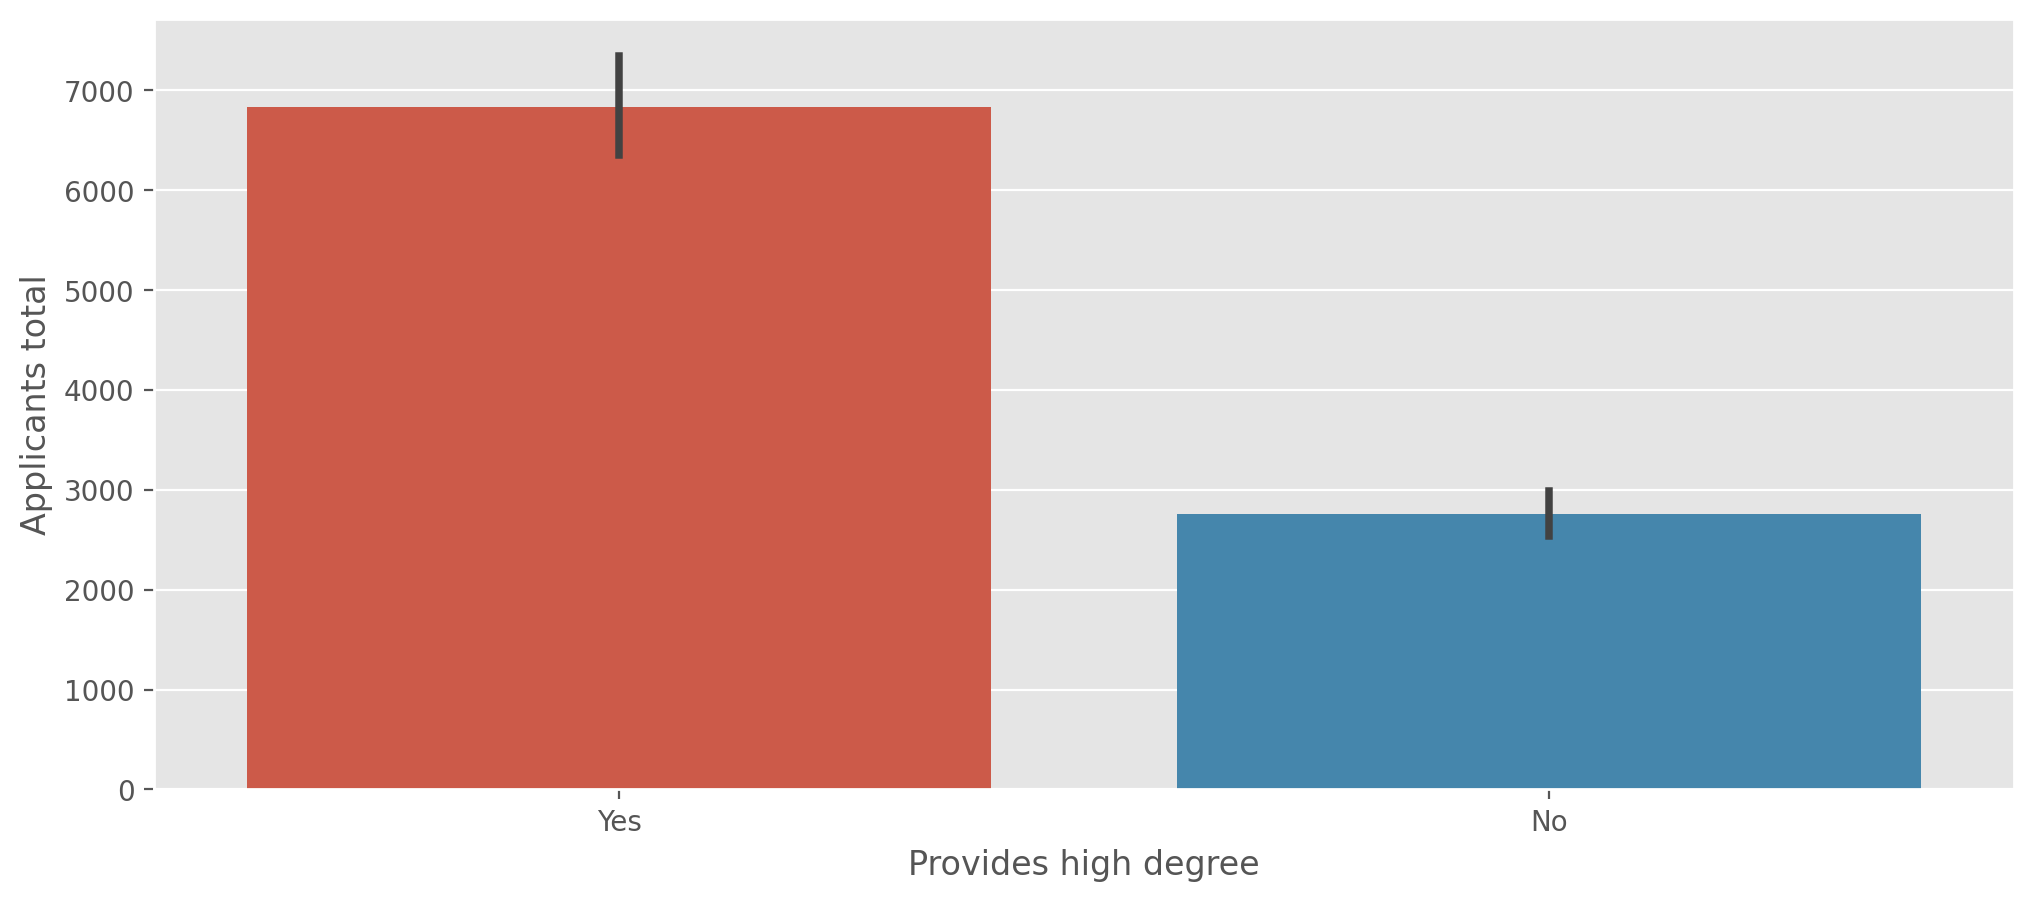

In [1413]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(y=main_df['Applicants total'], x=main_df['Provides high degree'])

<Axes: xlabel='Provides high degree', ylabel='Enrollment rate'>

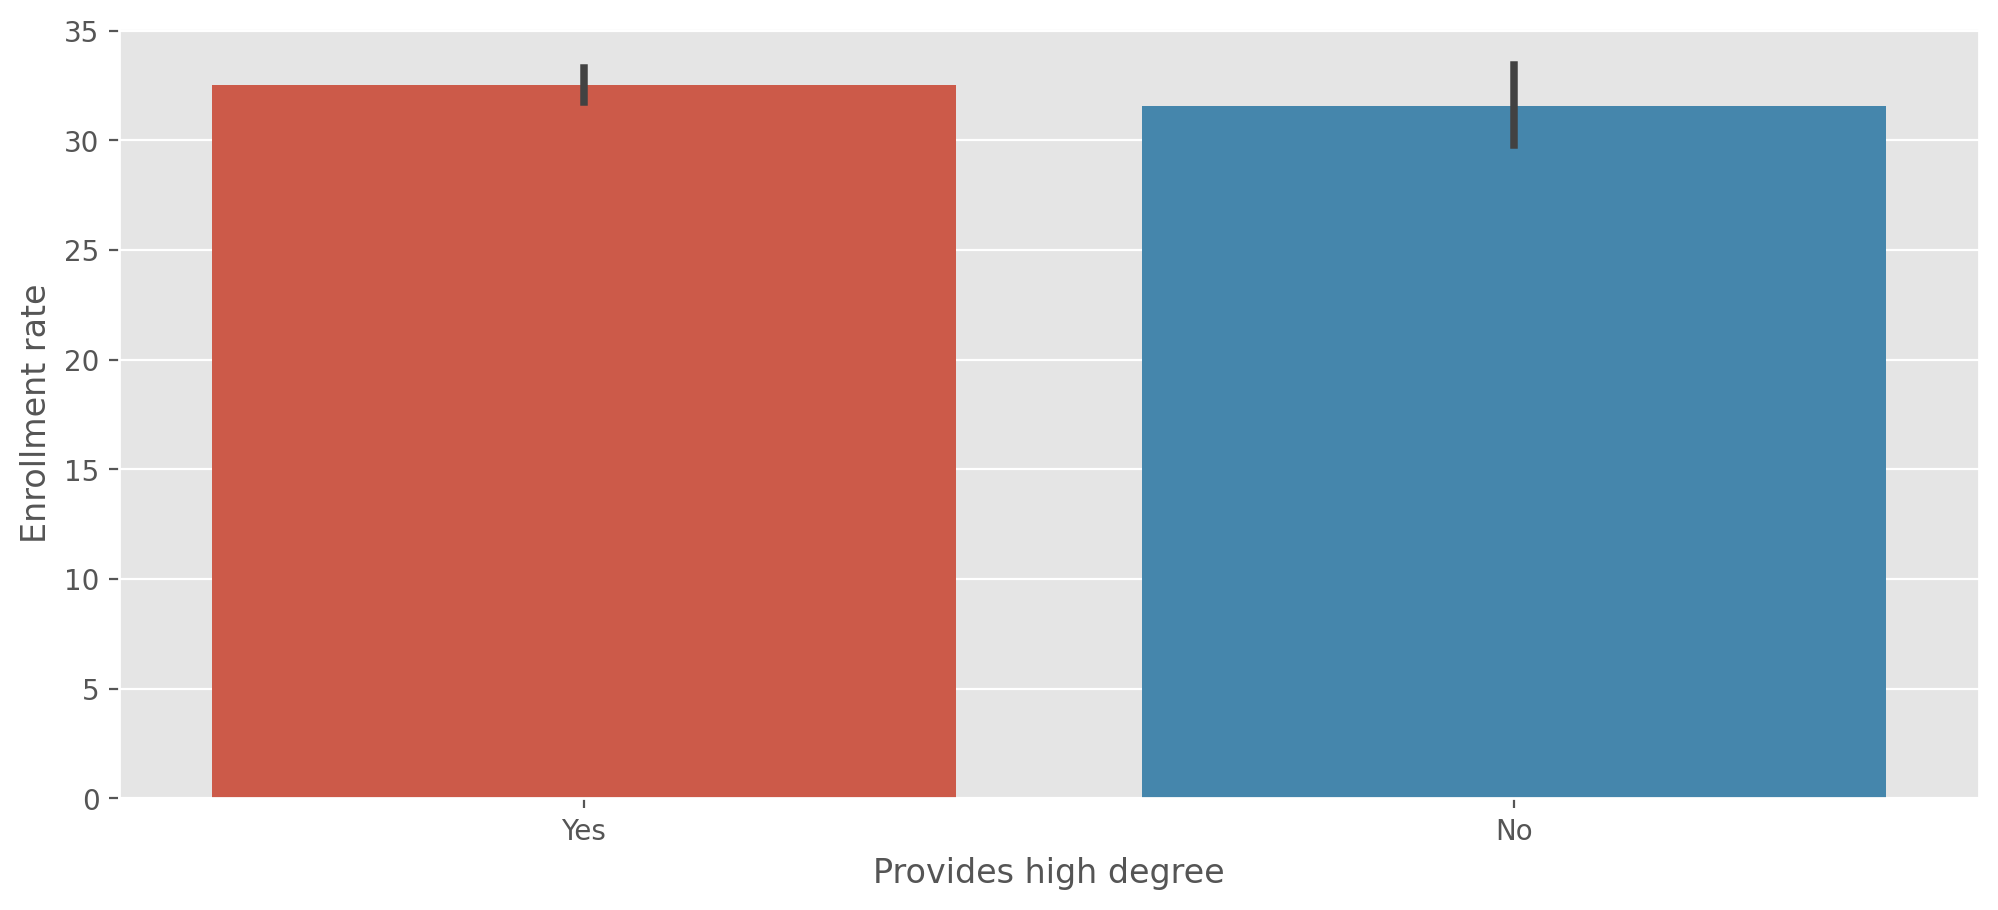

In [1414]:
plt.figure(figsize = (12,5), dpi = 200)
sns.barplot(y=main_df['Enrollment rate'], x=main_df['Provides high degree'])

**Insight**
- By seeing the above visualizations we can see that more applications are there for the universities that provides higher degree and also enrollment is more in those universities. Thus we can conclude that students prefer universities that offers higher degrees

# Insights and conclusion
- 1) Students preferred universities with less no. of applications..
- 2) We cannot say that students prefer the universities with more admission rate. Students did not prefer a university where it is easier for them to be admitted!
- 3) Students seem to prefer public universities
- 4) Students seem to prefer the universities with lesser tuition fees.
- 5) Students prefer a university for its low on-campus cost of living
- 7) Students does not prefer a university because it belongs to a state with a high GDP per capita
- 8) Yes students prefer universities that offers higher degrees